In [1]:
# Import libraries
import import_ipynb
import fraudmodel
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import lightgbm as lgbm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, confusion_matrix, precision_score, f1_score

importing Jupyter notebook from fraudmodel.ipynb


In [25]:
# Import dataset
df = pd.read_csv('data/Old_input.csv')
df2 = df[['transaction_risk_score','cc_amount','ledger_balance','cardholder_presence','card_presence',
          'partial_approval_capable','channel','processing_type','date','cc_acceptor_state','cc_acceptor_country','is_fraud']]
df2 = df2.sort_values(by='date')
df2 = df2.drop("date",axis=1)

Splitting data with ratio 0.5 as training set
-----RandomForest-----
Size of train set:  (7660, 10)
Size of test set:  (7661, 10)



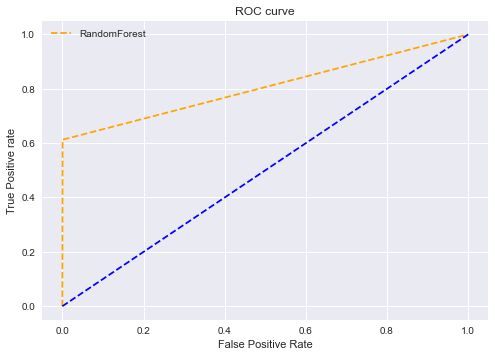

Precision:  0.967
Recall:  0.613
Accuracy:  0.99
F1_score:  0.75
AUC: 0.806
Confusion-matrix: 
[[7466    4]
 [  74  117]]


Splitting data with ratio 0.6 as training set
-----RandomForest-----
Size of train set:  (9192, 10)
Size of test set:  (6129, 10)



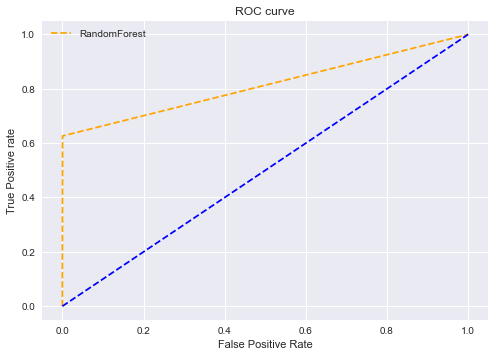

Precision:  0.973
Recall:  0.626
Accuracy:  0.989
F1_score:  0.762
AUC: 0.813
Confusion-matrix: 
[[5952    3]
 [  65  109]]


Splitting data with ratio 0.7 as training set
-----RandomForest-----
Size of train set:  (10724, 10)
Size of test set:  (4597, 10)



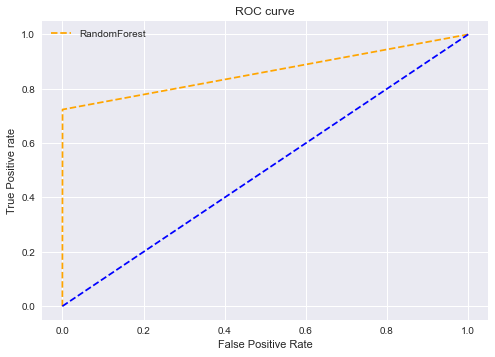

Precision:  0.982
Recall:  0.724
Accuracy:  0.99
F1_score:  0.833
AUC: 0.862
Confusion-matrix: 
[[4443    2]
 [  42  110]]


Splitting data with ratio 0.8 as training set
-----RandomForest-----
Size of train set:  (12256, 10)
Size of test set:  (3065, 10)



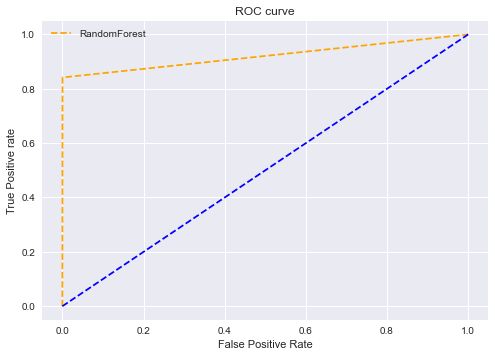

Precision:  0.99
Recall:  0.842
Accuracy:  0.993
F1_score:  0.91
AUC: 0.921
Confusion-matrix: 
[[2944    1]
 [  19  101]]


Splitting data with ratio 0.9 as training set
-----RandomForest-----
Size of train set:  (13788, 10)
Size of test set:  (1533, 10)



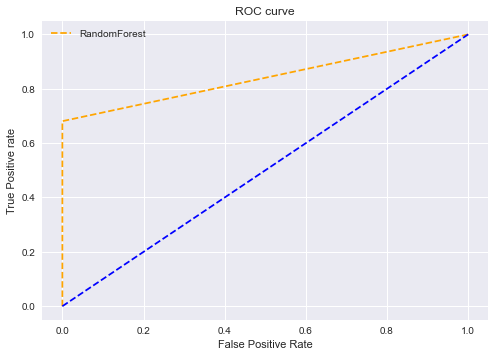

Precision:  1.0
Recall:  0.681
Accuracy:  0.99
F1_score:  0.81
AUC: 0.84
Confusion-matrix: 
[[1486    0]
 [  15   32]]




In [26]:
Generalsplit = []
for i in range(5):
    ratio = 0.5 + i * 0.1
    print("Splitting data with ratio " + str(ratio) + ' as training set')
    m = fraudmodel.GeneralSplit(df2,ratio,'RandomForest')
    Generalsplit.append(m)
    print()

Splitting data with ratio 0.5 as training set
-----LightGBM-----
Size of train set:  (7660, 10)
Size of test set:  (7661, 10)



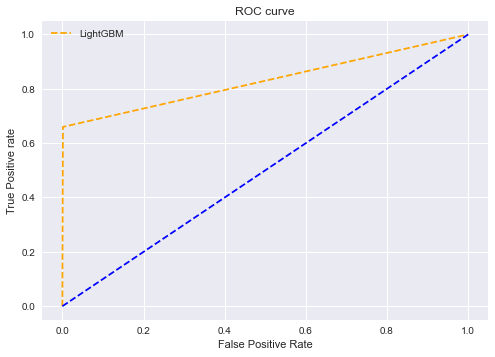

Precision:  0.926
Recall:  0.66
Accuracy:  0.99
F1_score:  0.771
AUC: 0.829
Confusion-matrix: 
[[7460   10]
 [  65  126]]


Splitting data with ratio 0.6 as training set
-----LightGBM-----
Size of train set:  (9192, 10)
Size of test set:  (6129, 10)



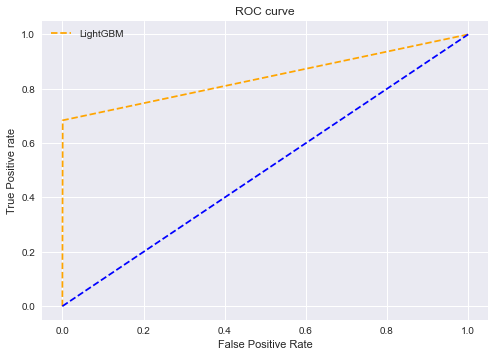

Precision:  0.96
Recall:  0.684
Accuracy:  0.99
F1_score:  0.799
AUC: 0.842
Confusion-matrix: 
[[5950    5]
 [  55  119]]


Splitting data with ratio 0.7 as training set
-----LightGBM-----
Size of train set:  (10724, 10)
Size of test set:  (4597, 10)



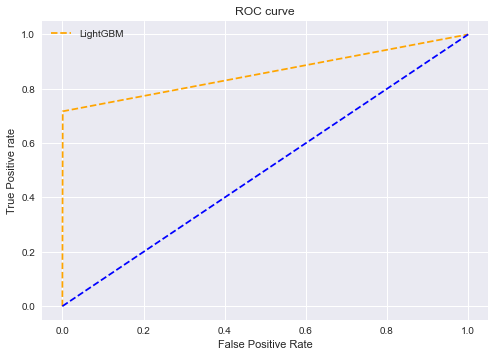

Precision:  0.965
Recall:  0.717
Accuracy:  0.99
F1_score:  0.823
AUC: 0.858
Confusion-matrix: 
[[4441    4]
 [  43  109]]


Splitting data with ratio 0.8 as training set
-----LightGBM-----
Size of train set:  (12256, 10)
Size of test set:  (3065, 10)



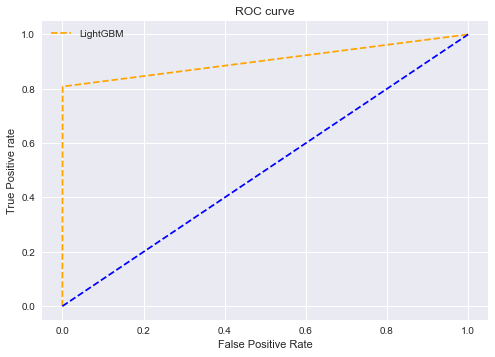

Precision:  0.98
Recall:  0.808
Accuracy:  0.992
F1_score:  0.886
AUC: 0.904
Confusion-matrix: 
[[2943    2]
 [  23   97]]


Splitting data with ratio 0.9 as training set
-----LightGBM-----
Size of train set:  (13788, 10)
Size of test set:  (1533, 10)



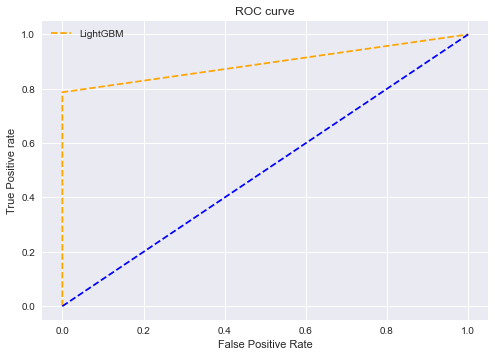

Precision:  1.0
Recall:  0.787
Accuracy:  0.993
F1_score:  0.881
AUC: 0.894
Confusion-matrix: 
[[1486    0]
 [  10   37]]




In [27]:
GeneralLGBM = []
for i in range(5):
    ratio = 0.5 + i * 0.1
    print("Splitting data with ratio " + str(ratio) + ' as training set')
    m = fraudmodel.GeneralSplit(df2,ratio,'LightGBM')
    GeneralLGBM.append(m)
    print()

In [28]:
X = df2.drop("is_fraud",axis=1)
y = df2[['is_fraud']].values.flatten()
scalar = StandardScaler()
X_scale = scalar.fit_transform(X)

-----RandomForest-----
Size of data set:  (15321, 10)
Size of each fold:  3064

Splitting the first 2 chunks with ratio 1:1
Size of train + test:  (6128, 10)
Precision on fold 2:  0.936
Recall on fold 2:  0.579
Accuracy on fold 2:  0.989
F1_score on fold 2:  0.715
AUC on fold 2:  0.789
Confusion-matrix: 
[[2984    3]
 [  32   44]]


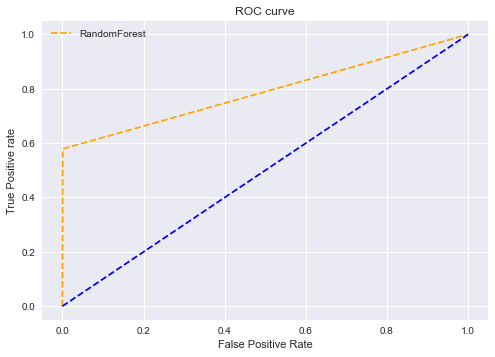


Splitting the first 3 chunks with ratio 2:1
Size of train + test:  (9192, 10)
Precision on fold 3:  0.9
Recall on fold 3:  0.34
Accuracy on fold 3:  0.988
F1_score on fold 3:  0.493
AUC on fold 3:  0.669
Confusion-matrix: 
[[3008    2]
 [  35   18]]


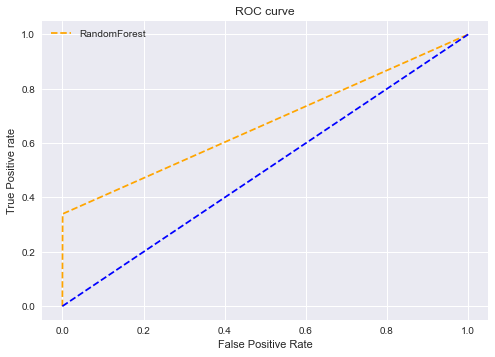


Splitting the first 4 chunks with ratio 3:1
Size of train + test:  (12256, 10)
Precision on fold 4:  0.917
Recall on fold 4:  0.204
Accuracy on fold 4:  0.986
F1_score on fold 4:  0.333
AUC on fold 4:  0.602
Confusion-matrix: 
[[3008    1]
 [  43   11]]


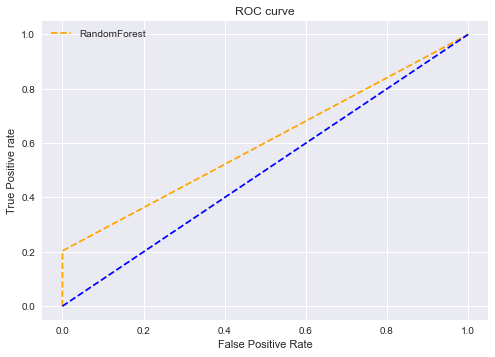


Splitting the first 5 chunks with ratio 4:1
Size of train + test:  (15320, 10)
Precision on fold 5:  0.99
Recall on fold 5:  0.85
Accuracy on fold 5:  0.994
F1_score on fold 5:  0.915
AUC on fold 5:  0.925
Confusion-matrix: 
[[2942    1]
 [  18  102]]


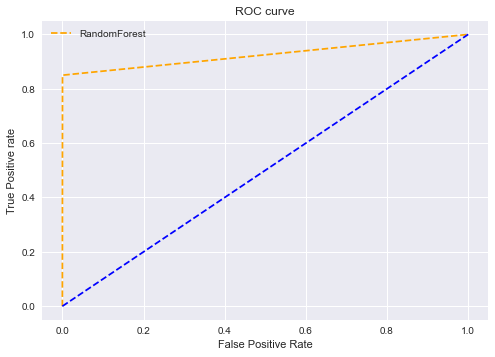

Precision mean: 0.9357500000000001
Recall mean: 0.49324999999999997
Accuracy mean: 0.98925
F1-Score mean: 0.614
AUC mean: 0.7462500000000001


In [29]:
RF5 = fraudmodel.TimeSeriesKFold(X, y, 5, 'RandomForest')

-----RandomForest-----
Size of data set:  (15321, 10)
Size of each fold:  1532

Splitting the first 2 chunks with ratio 1:1
Size of train + test:  (3064, 10)
Precision on fold 2:  0.758
Recall on fold 2:  0.581
Accuracy on fold 2:  0.983
F1_score on fold 2:  0.658
AUC on fold 2:  0.788
Confusion-matrix: 
[[1480    8]
 [  18   25]]


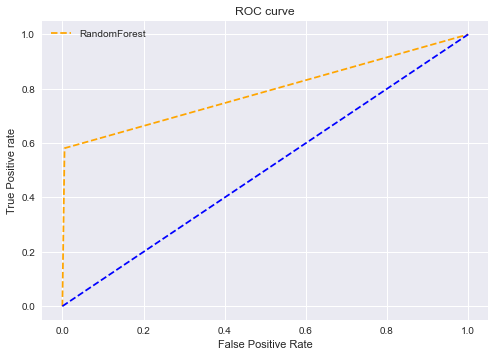


Splitting the first 3 chunks with ratio 2:1
Size of train + test:  (4596, 10)
Precision on fold 3:  0.95
Recall on fold 3:  0.528
Accuracy on fold 3:  0.988
F1_score on fold 3:  0.679
AUC on fold 3:  0.764
Confusion-matrix: 
[[1494    1]
 [  17   19]]


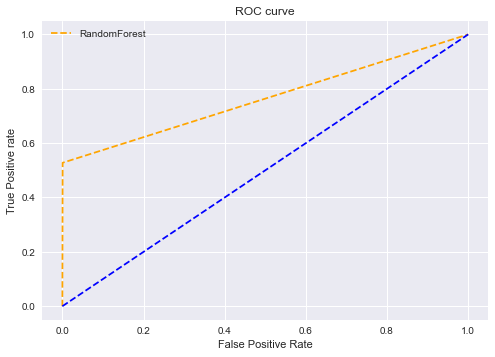


Splitting the first 4 chunks with ratio 3:1
Size of train + test:  (6128, 10)
Precision on fold 4:  0.962
Recall on fold 4:  0.625
Accuracy on fold 4:  0.99
F1_score on fold 4:  0.758
AUC on fold 4:  0.812
Confusion-matrix: 
[[1490    1]
 [  15   25]]


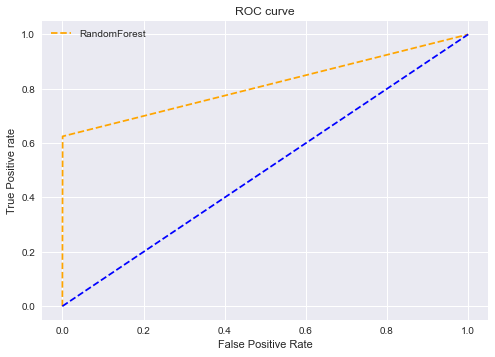


Splitting the first 5 chunks with ratio 4:1
Size of train + test:  (7660, 10)
Precision on fold 5:  0.941
Recall on fold 5:  0.444
Accuracy on fold 5:  0.986
F1_score on fold 5:  0.604
AUC on fold 5:  0.722
Confusion-matrix: 
[[1494    1]
 [  20   16]]


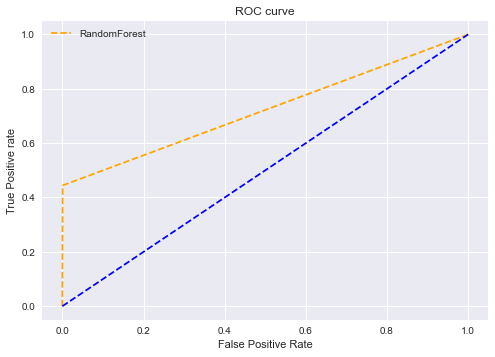


Splitting the first 6 chunks with ratio 5:1
Size of train + test:  (9192, 10)
Precision on fold 6:  0.833
Recall on fold 6:  0.294
Accuracy on fold 6:  0.992
F1_score on fold 6:  0.435
AUC on fold 6:  0.647
Confusion-matrix: 
[[1513    1]
 [  12    5]]


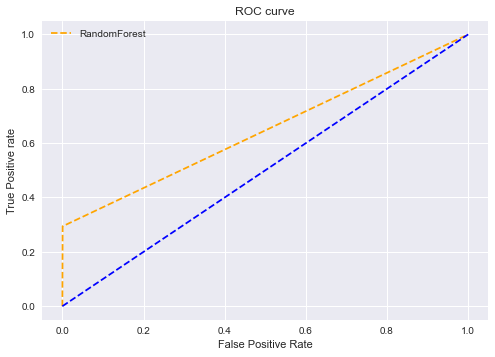


Splitting the first 7 chunks with ratio 6:1
Size of train + test:  (10724, 10)
Precision on fold 7:  0.857
Recall on fold 7:  0.273
Accuracy on fold 7:  0.989
F1_score on fold 7:  0.414
AUC on fold 7:  0.636
Confusion-matrix: 
[[1508    1]
 [  16    6]]


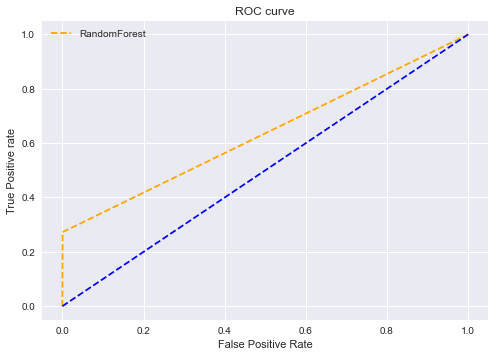


Splitting the first 8 chunks with ratio 7:1
Size of train + test:  (12256, 10)
Precision on fold 8:  1.0
Recall on fold 8:  0.344
Accuracy on fold 8:  0.986
F1_score on fold 8:  0.512
AUC on fold 8:  0.672
Confusion-matrix: 
[[1499    0]
 [  21   11]]


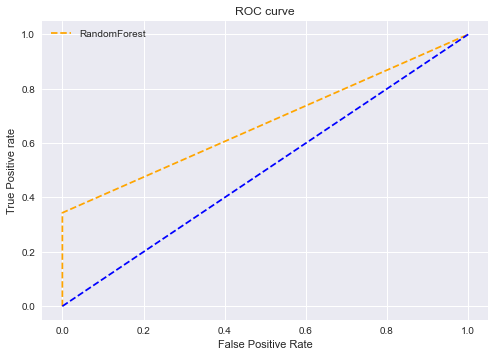


Splitting the first 9 chunks with ratio 8:1
Size of train + test:  (13788, 10)
Precision on fold 9:  0.986
Recall on fold 9:  0.945
Accuracy on fold 9:  0.997
F1_score on fold 9:  0.965
AUC on fold 9:  0.972
Confusion-matrix: 
[[1457    1]
 [   4   69]]


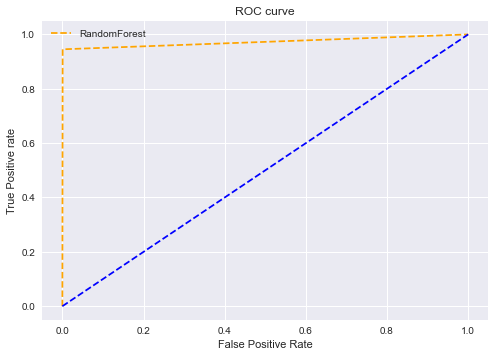


Splitting the first 10 chunks with ratio 9:1
Size of train + test:  (15320, 10)
Precision on fold 10:  1.0
Recall on fold 10:  0.681
Accuracy on fold 10:  0.99
F1_score on fold 10:  0.81
AUC on fold 10:  0.84
Confusion-matrix: 
[[1484    0]
 [  15   32]]


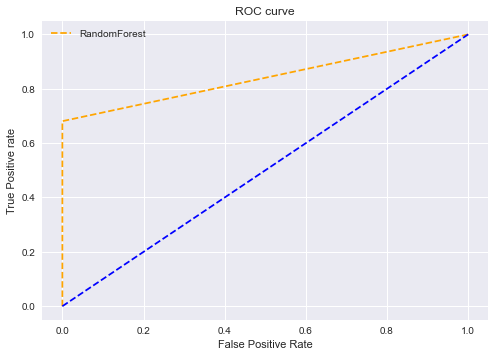

Precision mean: 0.9207777777777777
Recall mean: 0.5238888888888888
Accuracy mean: 0.989
F1-Score mean: 0.6483333333333334
AUC mean: 0.7614444444444444


In [30]:
RF10 = fraudmodel.TimeSeriesKFold(X, y, 10, 'RandomForest')

-----RandomForest-----
Size of data set:  (15321, 10)
Size of each fold:  1021

Splitting the first 2 chunks with ratio 1:1
Size of train + test:  (2042, 10)
Precision on fold 2:  0.733
Recall on fold 2:  0.786
Accuracy on fold 2:  0.986
F1_score on fold 2:  0.759
AUC on fold 2:  0.889
Confusion-matrix: 
[[984   8]
 [  6  22]]


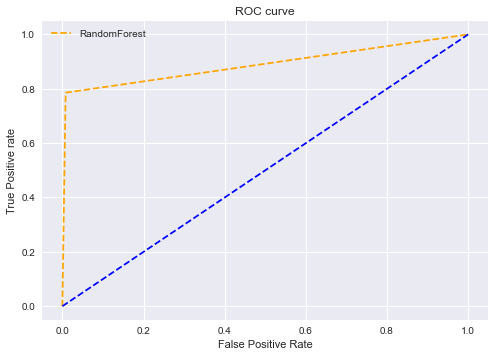


Splitting the first 3 chunks with ratio 2:1
Size of train + test:  (3063, 10)
Precision on fold 3:  0.867
Recall on fold 3:  0.481
Accuracy on fold 3:  0.984
F1_score on fold 3:  0.619
AUC on fold 3:  0.74
Confusion-matrix: 
[[991   2]
 [ 14  13]]


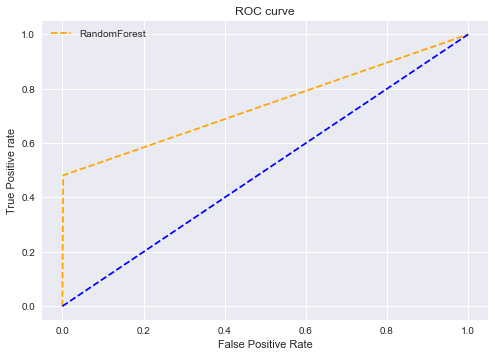


Splitting the first 4 chunks with ratio 3:1
Size of train + test:  (4084, 10)
Precision on fold 4:  0.923
Recall on fold 4:  0.462
Accuracy on fold 4:  0.985
F1_score on fold 4:  0.615
AUC on fold 4:  0.73
Confusion-matrix: 
[[993   1]
 [ 14  12]]


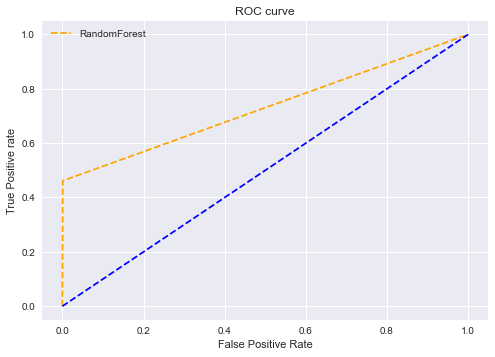


Splitting the first 5 chunks with ratio 4:1
Size of train + test:  (5105, 10)
Precision on fold 5:  1.0
Recall on fold 5:  0.783
Accuracy on fold 5:  0.995
F1_score on fold 5:  0.878
AUC on fold 5:  0.891
Confusion-matrix: 
[[997   0]
 [  5  18]]


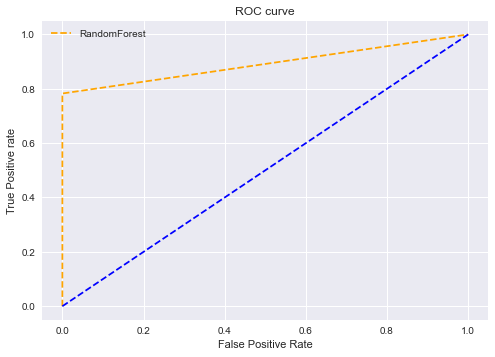


Splitting the first 6 chunks with ratio 5:1
Size of train + test:  (6126, 10)
Precision on fold 6:  0.933
Recall on fold 6:  0.519
Accuracy on fold 6:  0.986
F1_score on fold 6:  0.667
AUC on fold 6:  0.759
Confusion-matrix: 
[[992   1]
 [ 13  14]]


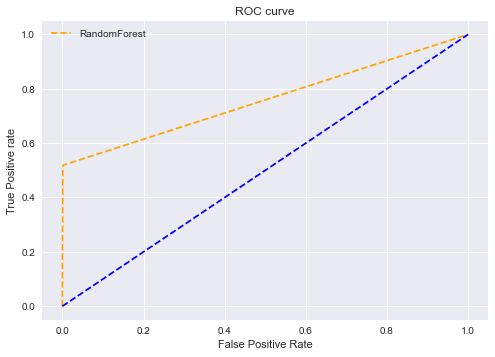


Splitting the first 7 chunks with ratio 6:1
Size of train + test:  (7147, 10)
Precision on fold 7:  0.941
Recall on fold 7:  0.5
Accuracy on fold 7:  0.983
F1_score on fold 7:  0.653
AUC on fold 7:  0.749
Confusion-matrix: 
[[987   1]
 [ 16  16]]


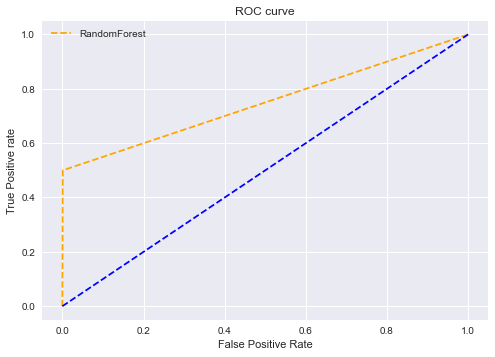


Splitting the first 8 chunks with ratio 7:1
Size of train + test:  (8168, 10)
Precision on fold 8:  0.857
Recall on fold 8:  0.545
Accuracy on fold 8:  0.994
F1_score on fold 8:  0.667
AUC on fold 8:  0.772
Confusion-matrix: 
[[1008    1]
 [   5    6]]


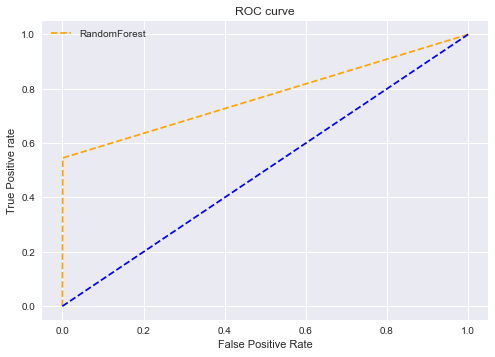


Splitting the first 9 chunks with ratio 8:1
Size of train + test:  (9189, 10)
Precision on fold 9:  1.0
Recall on fold 9:  0.3
Accuracy on fold 9:  0.993
F1_score on fold 9:  0.462
AUC on fold 9:  0.65
Confusion-matrix: 
[[1010    0]
 [   7    3]]


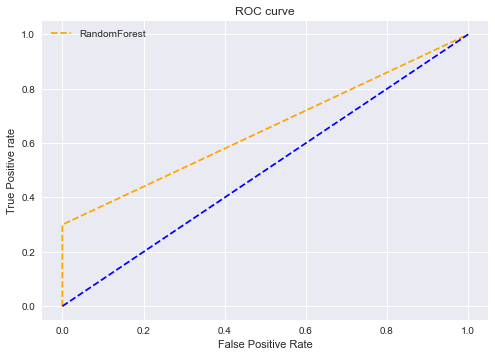


Splitting the first 10 chunks with ratio 9:1
Size of train + test:  (10210, 10)
Precision on fold 10:  0.667
Recall on fold 10:  0.118
Accuracy on fold 10:  0.984
F1_score on fold 10:  0.2
AUC on fold 10:  0.558
Confusion-matrix: 
[[1002    1]
 [  15    2]]


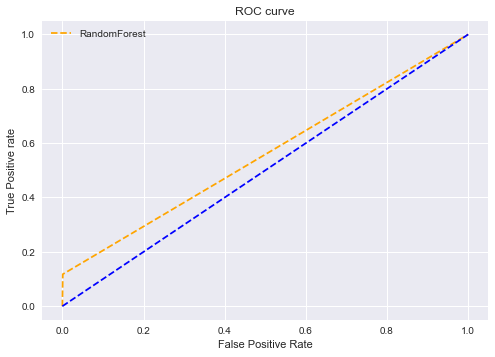


Splitting the first 11 chunks with ratio 10:1
Size of train + test:  (11231, 10)
Precision on fold 11:  1.0
Recall on fold 11:  0.75
Accuracy on fold 11:  0.998
F1_score on fold 11:  0.857
AUC on fold 11:  0.875
Confusion-matrix: 
[[1012    0]
 [   2    6]]


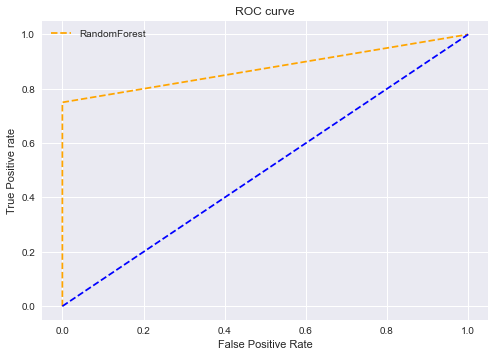


Splitting the first 12 chunks with ratio 11:1
Size of train + test:  (12252, 10)
Precision on fold 12:  1.0
Recall on fold 12:  0.345
Accuracy on fold 12:  0.981
F1_score on fold 12:  0.513
AUC on fold 12:  0.672
Confusion-matrix: 
[[991   0]
 [ 19  10]]


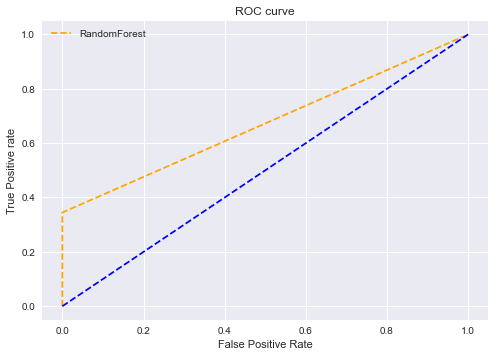


Splitting the first 13 chunks with ratio 12:1
Size of train + test:  (13273, 10)
Precision on fold 13:  1.0
Recall on fold 13:  0.778
Accuracy on fold 13:  0.998
F1_score on fold 13:  0.875
AUC on fold 13:  0.889
Confusion-matrix: 
[[1011    0]
 [   2    7]]


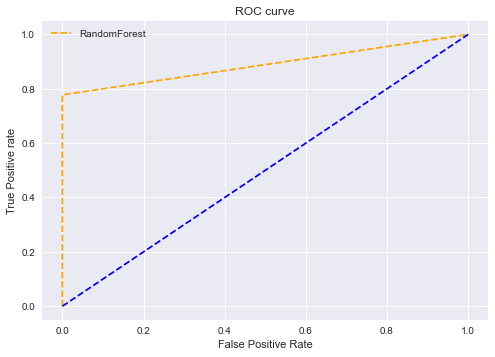


Splitting the first 14 chunks with ratio 13:1
Size of train + test:  (14294, 10)
Precision on fold 14:  0.985
Recall on fold 14:  0.957
Accuracy on fold 14:  0.996
F1_score on fold 14:  0.971
AUC on fold 14:  0.978
Confusion-matrix: 
[[949   1]
 [  3  67]]


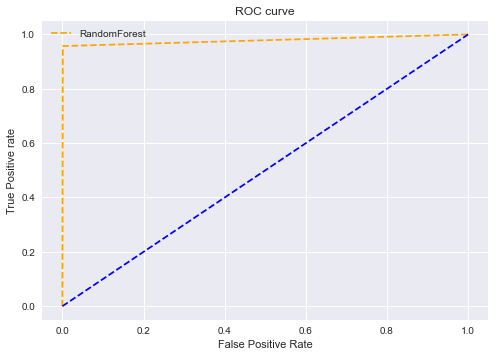


Splitting the first 15 chunks with ratio 14:1
Size of train + test:  (15315, 10)
Precision on fold 15:  1.0
Recall on fold 15:  0.659
Accuracy on fold 15:  0.986
F1_score on fold 15:  0.794
AUC on fold 15:  0.829
Confusion-matrix: 
[[979   0]
 [ 14  27]]


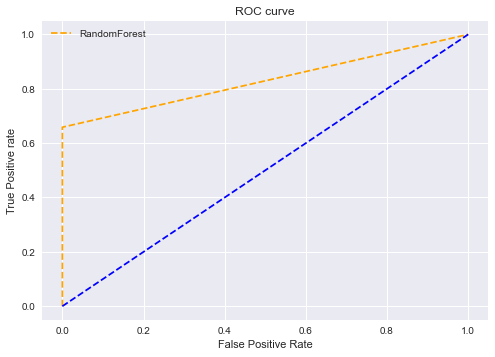

Precision mean: 0.9218571428571428
Recall mean: 0.5702142857142858
Accuracy mean: 0.9892142857142857
F1-Score mean: 0.6807142857142858
AUC mean: 0.7843571428571429


In [31]:
RF15 = fraudmodel.TimeSeriesKFold(X, y, 15, 'RandomForest')

-----RandomForest-----
Size of data set:  (15321, 10)
Size of each fold:  766

Splitting the first 2 chunks with ratio 1:1
Size of train + test:  (1532, 10)
Precision on fold 2:  0.833
Recall on fold 2:  0.882
Accuracy on fold 2:  0.993
F1_score on fold 2:  0.857
AUC on fold 2:  0.939
Confusion-matrix: 
[[745   3]
 [  2  15]]


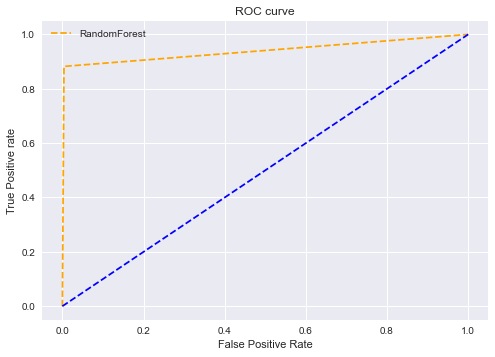


Splitting the first 3 chunks with ratio 2:1
Size of train + test:  (2298, 10)
Precision on fold 3:  0.833
Recall on fold 3:  0.769
Accuracy on fold 3:  0.987
F1_score on fold 3:  0.8
AUC on fold 3:  0.882
Confusion-matrix: 
[[735   4]
 [  6  20]]


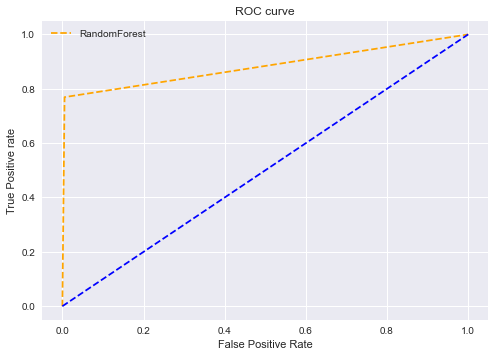


Splitting the first 4 chunks with ratio 3:1
Size of train + test:  (3064, 10)
Precision on fold 4:  0.857
Recall on fold 4:  0.353
Accuracy on fold 4:  0.984
F1_score on fold 4:  0.5
AUC on fold 4:  0.676
Confusion-matrix: 
[[747   1]
 [ 11   6]]


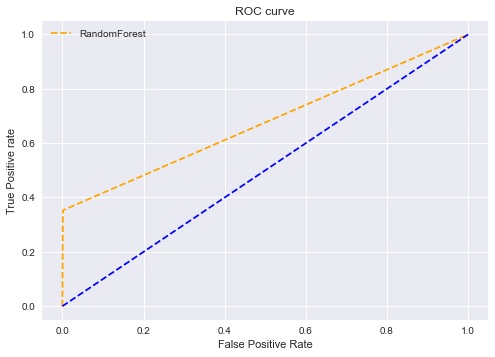


Splitting the first 5 chunks with ratio 4:1
Size of train + test:  (3830, 10)
Precision on fold 5:  0.5
Recall on fold 5:  0.083
Accuracy on fold 5:  0.984
F1_score on fold 5:  0.143
AUC on fold 5:  0.541
Confusion-matrix: 
[[752   1]
 [ 11   1]]


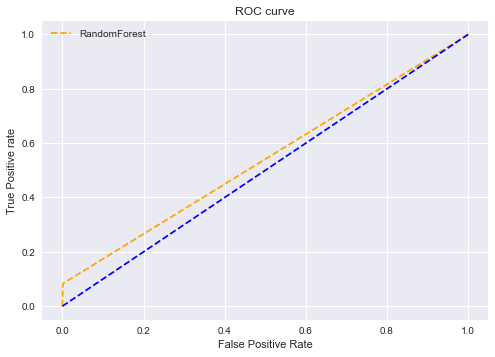


Splitting the first 6 chunks with ratio 5:1
Size of train + test:  (4596, 10)
Precision on fold 6:  1.0
Recall on fold 6:  0.75
Accuracy on fold 6:  0.992
F1_score on fold 6:  0.857
AUC on fold 6:  0.875
Confusion-matrix: 
[[741   0]
 [  6  18]]


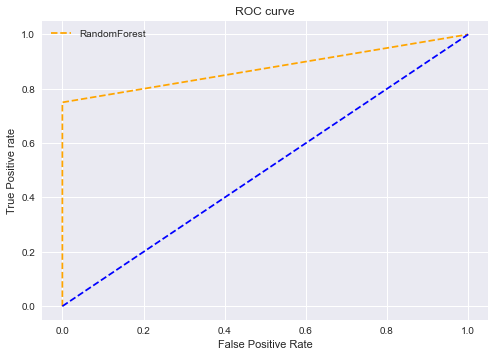


Splitting the first 7 chunks with ratio 6:1
Size of train + test:  (5362, 10)
Precision on fold 7:  1.0
Recall on fold 7:  0.688
Accuracy on fold 7:  0.993
F1_score on fold 7:  0.815
AUC on fold 7:  0.844
Confusion-matrix: 
[[749   0]
 [  5  11]]


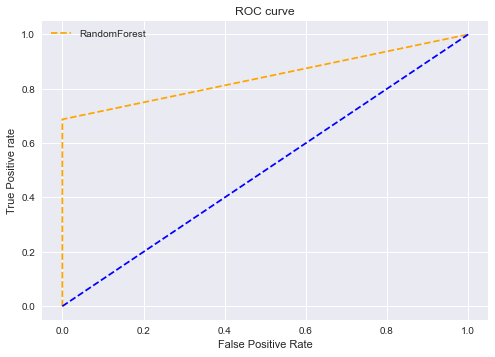


Splitting the first 8 chunks with ratio 7:1
Size of train + test:  (6128, 10)
Precision on fold 8:  0.933
Recall on fold 8:  0.583
Accuracy on fold 8:  0.986
F1_score on fold 8:  0.718
AUC on fold 8:  0.791
Confusion-matrix: 
[[740   1]
 [ 10  14]]


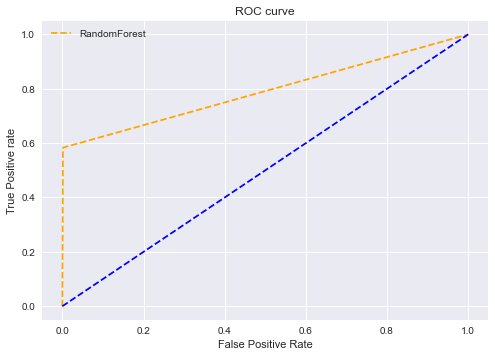


Splitting the first 9 chunks with ratio 8:1
Size of train + test:  (6894, 10)
Precision on fold 9:  0.941
Recall on fold 9:  0.593
Accuracy on fold 9:  0.984
F1_score on fold 9:  0.727
AUC on fold 9:  0.796
Confusion-matrix: 
[[737   1]
 [ 11  16]]


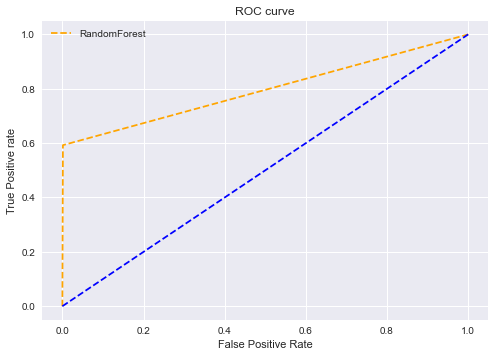


Splitting the first 10 chunks with ratio 9:1
Size of train + test:  (7660, 10)
Precision on fold 10:  0.8
Recall on fold 10:  0.444
Accuracy on fold 10:  0.992
F1_score on fold 10:  0.571
AUC on fold 10:  0.722
Confusion-matrix: 
[[755   1]
 [  5   4]]


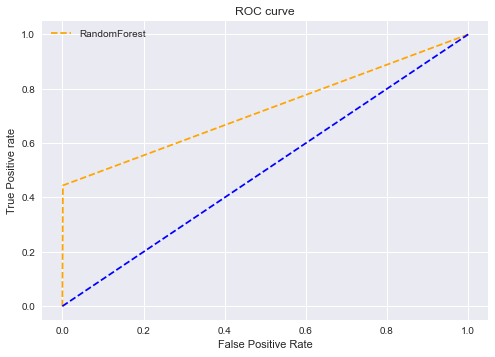


Splitting the first 11 chunks with ratio 10:1
Size of train + test:  (8426, 10)
Precision on fold 11:  0.667
Recall on fold 11:  0.2
Accuracy on fold 11:  0.988
F1_score on fold 11:  0.308
AUC on fold 11:  0.599
Confusion-matrix: 
[[754   1]
 [  8   2]]


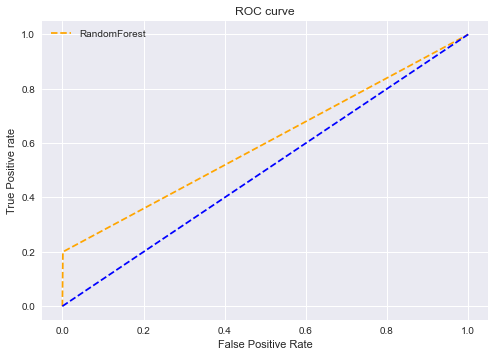


Splitting the first 12 chunks with ratio 11:1
Size of train + test:  (9192, 10)
Precision on fold 12:  1.0
Recall on fold 12:  0.429
Accuracy on fold 12:  0.995
F1_score on fold 12:  0.6
AUC on fold 12:  0.714
Confusion-matrix: 
[[758   0]
 [  4   3]]


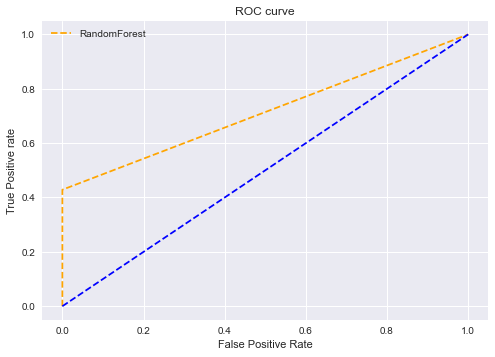


Splitting the first 13 chunks with ratio 12:1
Size of train + test:  (9958, 10)
Precision on fold 13:  0.667
Recall on fold 13:  0.125
Accuracy on fold 13:  0.98
F1_score on fold 13:  0.211
AUC on fold 13:  0.562
Confusion-matrix: 
[[748   1]
 [ 14   2]]


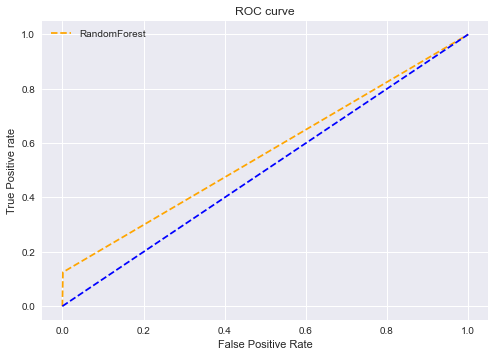


Splitting the first 14 chunks with ratio 13:1
Size of train + test:  (10724, 10)
Precision on fold 14:  1.0
Recall on fold 14:  0.667
Accuracy on fold 14:  0.997
F1_score on fold 14:  0.8
AUC on fold 14:  0.833
Confusion-matrix: 
[[759   0]
 [  2   4]]


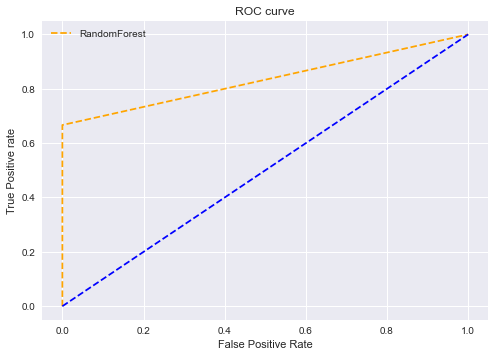


Splitting the first 15 chunks with ratio 14:1
Size of train + test:  (11490, 10)
Precision on fold 15:  1.0
Recall on fold 15:  0.714
Accuracy on fold 15:  0.997
F1_score on fold 15:  0.833
AUC on fold 15:  0.857
Confusion-matrix: 
[[758   0]
 [  2   5]]


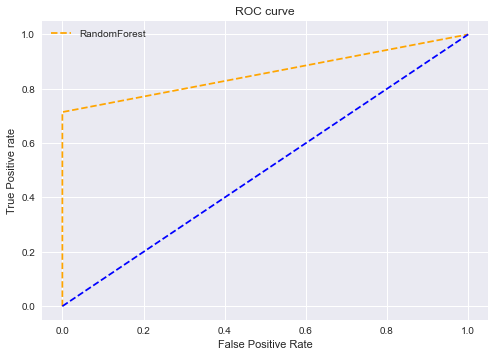


Splitting the first 16 chunks with ratio 15:1
Size of train + test:  (12256, 10)
Precision on fold 16:  1.0
Recall on fold 16:  0.24
Accuracy on fold 16:  0.975
F1_score on fold 16:  0.387
AUC on fold 16:  0.62
Confusion-matrix: 
[[740   0]
 [ 19   6]]


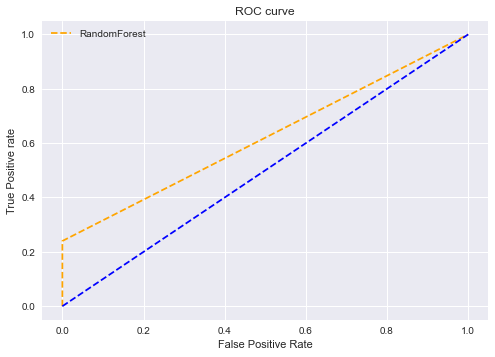


Splitting the first 17 chunks with ratio 16:1
Size of train + test:  (13022, 10)
Precision on fold 17:  1.0
Recall on fold 17:  0.875
Accuracy on fold 17:  0.999
F1_score on fold 17:  0.933
AUC on fold 17:  0.938
Confusion-matrix: 
[[757   0]
 [  1   7]]


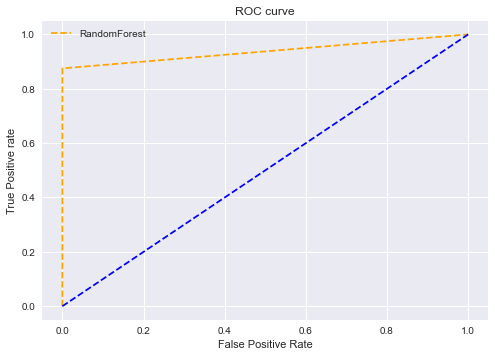


Splitting the first 18 chunks with ratio 17:1
Size of train + test:  (13788, 10)
Precision on fold 18:  0.984
Recall on fold 18:  0.954
Accuracy on fold 18:  0.995
F1_score on fold 18:  0.969
AUC on fold 18:  0.976
Confusion-matrix: 
[[699   1]
 [  3  62]]


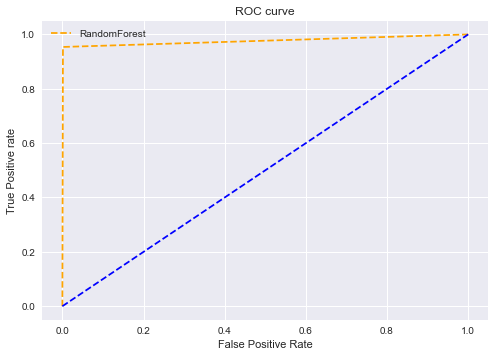


Splitting the first 19 chunks with ratio 18:1
Size of train + test:  (14554, 10)
Precision on fold 19:  1.0
Recall on fold 19:  0.714
Accuracy on fold 19:  0.997
F1_score on fold 19:  0.833
AUC on fold 19:  0.857
Confusion-matrix: 
[[758   0]
 [  2   5]]


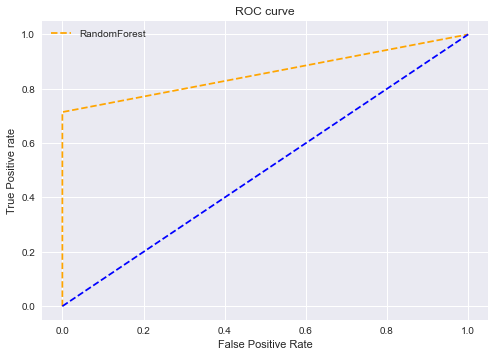


Splitting the first 20 chunks with ratio 19:1
Size of train + test:  (15320, 10)
Precision on fold 20:  1.0
Recall on fold 20:  0.675
Accuracy on fold 20:  0.983
F1_score on fold 20:  0.806
AUC on fold 20:  0.838
Confusion-matrix: 
[[725   0]
 [ 13  27]]


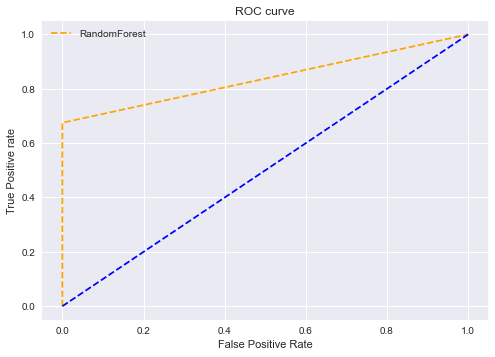

Precision mean: 0.8955263157894737
Recall mean: 0.5651578947368422
Accuracy mean: 0.9895263157894738
F1-Score mean: 0.6667368421052631
AUC mean: 0.7821052631578946


In [32]:
RF20 = fraudmodel.TimeSeriesKFold(X, y, 20, 'RandomForest')

-----LightGBM-----
Size of data set:  (15321, 10)
Size of each fold:  3064

Splitting the first 2 chunks with ratio 1:1
Size of train + test:  (6128, 10)
Precision on fold 2:  0.833
Recall on fold 2:  0.526
Accuracy on fold 2:  0.986
F1_score on fold 2:  0.645
AUC on fold 2:  0.762
Confusion-matrix: 
[[2979    8]
 [  36   40]]


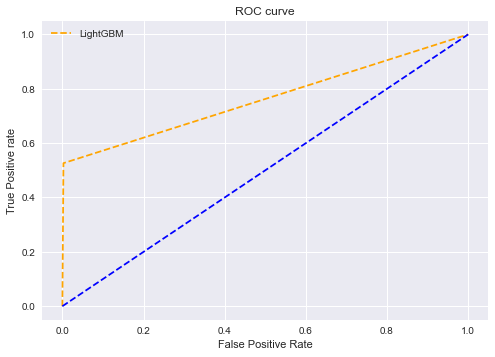


Splitting the first 3 chunks with ratio 2:1
Size of train + test:  (9192, 10)
Precision on fold 3:  0.84
Recall on fold 3:  0.396
Accuracy on fold 3:  0.988
F1_score on fold 3:  0.538
AUC on fold 3:  0.697
Confusion-matrix: 
[[3006    4]
 [  32   21]]


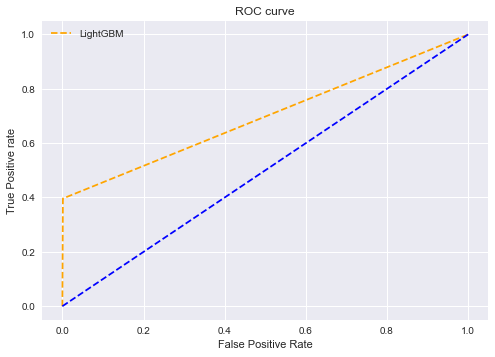


Splitting the first 4 chunks with ratio 3:1
Size of train + test:  (12256, 10)
Precision on fold 4:  0.842
Recall on fold 4:  0.296
Accuracy on fold 4:  0.987
F1_score on fold 4:  0.438
AUC on fold 4:  0.648
Confusion-matrix: 
[[3006    3]
 [  38   16]]


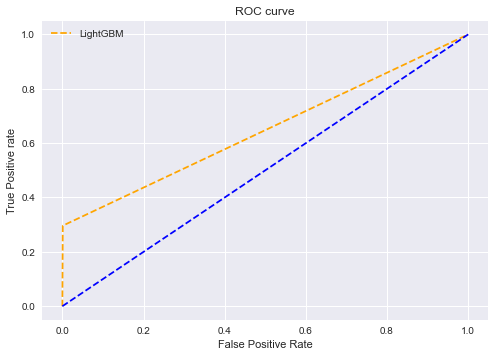


Splitting the first 5 chunks with ratio 4:1
Size of train + test:  (15320, 10)
Precision on fold 5:  0.978
Recall on fold 5:  0.742
Accuracy on fold 5:  0.989
F1_score on fold 5:  0.844
AUC on fold 5:  0.87
Confusion-matrix: 
[[2941    2]
 [  31   89]]


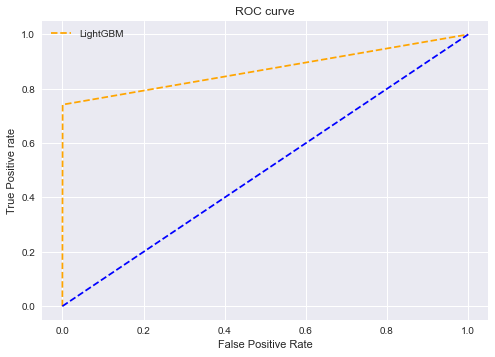

Precision mean: 0.8732500000000001
Recall mean: 0.49
Accuracy mean: 0.9874999999999999
F1-Score mean: 0.61625
AUC mean: 0.7442500000000001


In [33]:
LGBM5 = fraudmodel.TimeSeriesKFold(X, y, 5, 'LightGBM')

-----LightGBM-----
Size of data set:  (15321, 10)
Size of each fold:  1532

Splitting the first 2 chunks with ratio 1:1
Size of train + test:  (3064, 10)
Precision on fold 2:  0.812
Recall on fold 2:  0.605
Accuracy on fold 2:  0.985
F1_score on fold 2:  0.693
AUC on fold 2:  0.8
Confusion-matrix: 
[[1482    6]
 [  17   26]]


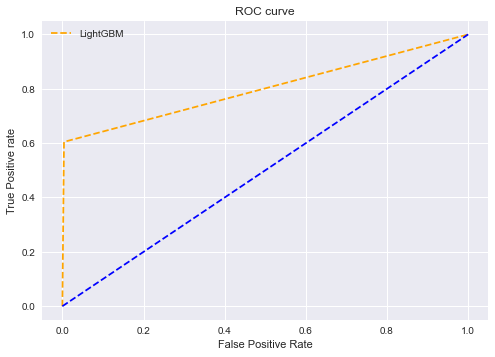


Splitting the first 3 chunks with ratio 2:1
Size of train + test:  (4596, 10)
Precision on fold 3:  0.762
Recall on fold 3:  0.444
Accuracy on fold 3:  0.984
F1_score on fold 3:  0.561
AUC on fold 3:  0.721
Confusion-matrix: 
[[1490    5]
 [  20   16]]


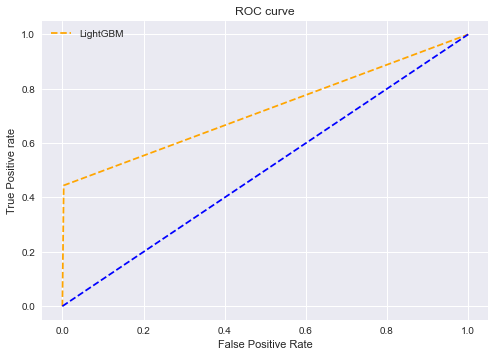


Splitting the first 4 chunks with ratio 3:1
Size of train + test:  (6128, 10)
Precision on fold 4:  0.96
Recall on fold 4:  0.6
Accuracy on fold 4:  0.989
F1_score on fold 4:  0.738
AUC on fold 4:  0.8
Confusion-matrix: 
[[1490    1]
 [  16   24]]


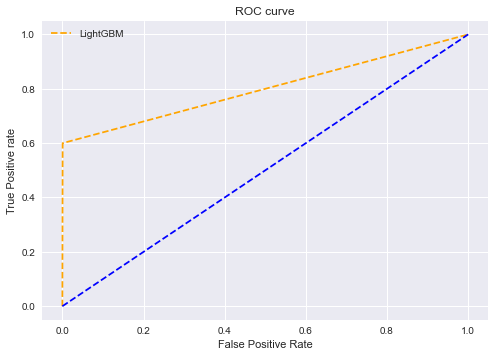


Splitting the first 5 chunks with ratio 4:1
Size of train + test:  (7660, 10)
Precision on fold 5:  0.947
Recall on fold 5:  0.5
Accuracy on fold 5:  0.988
F1_score on fold 5:  0.655
AUC on fold 5:  0.75
Confusion-matrix: 
[[1494    1]
 [  18   18]]


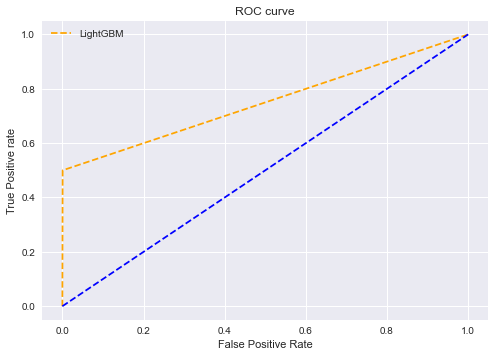


Splitting the first 6 chunks with ratio 5:1
Size of train + test:  (9192, 10)
Precision on fold 6:  0.714
Recall on fold 6:  0.294
Accuracy on fold 6:  0.991
F1_score on fold 6:  0.417
AUC on fold 6:  0.646
Confusion-matrix: 
[[1512    2]
 [  12    5]]


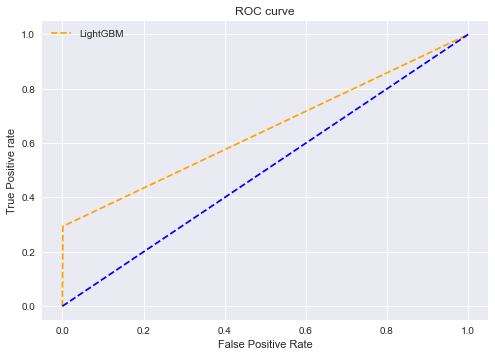


Splitting the first 7 chunks with ratio 6:1
Size of train + test:  (10724, 10)
Precision on fold 7:  0.9
Recall on fold 7:  0.409
Accuracy on fold 7:  0.991
F1_score on fold 7:  0.563
AUC on fold 7:  0.704
Confusion-matrix: 
[[1508    1]
 [  13    9]]


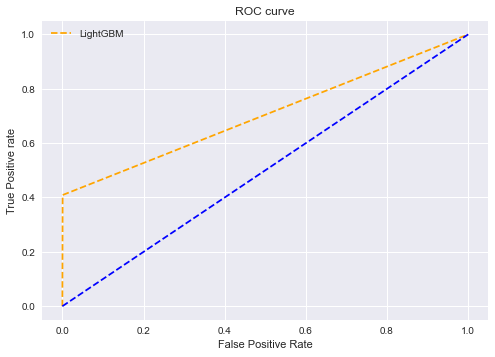


Splitting the first 8 chunks with ratio 7:1
Size of train + test:  (12256, 10)
Precision on fold 8:  0.909
Recall on fold 8:  0.312
Accuracy on fold 8:  0.985
F1_score on fold 8:  0.465
AUC on fold 8:  0.656
Confusion-matrix: 
[[1498    1]
 [  22   10]]


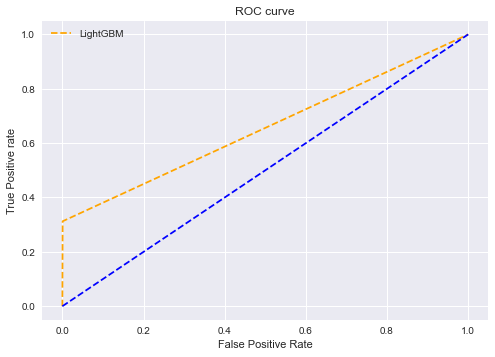


Splitting the first 9 chunks with ratio 8:1
Size of train + test:  (13788, 10)
Precision on fold 9:  0.97
Recall on fold 9:  0.89
Accuracy on fold 9:  0.993
F1_score on fold 9:  0.929
AUC on fold 9:  0.945
Confusion-matrix: 
[[1456    2]
 [   8   65]]


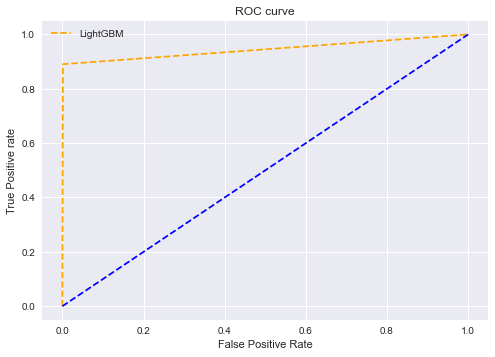


Splitting the first 10 chunks with ratio 9:1
Size of train + test:  (15320, 10)
Precision on fold 10:  1.0
Recall on fold 10:  0.596
Accuracy on fold 10:  0.988
F1_score on fold 10:  0.747
AUC on fold 10:  0.798
Confusion-matrix: 
[[1484    0]
 [  19   28]]


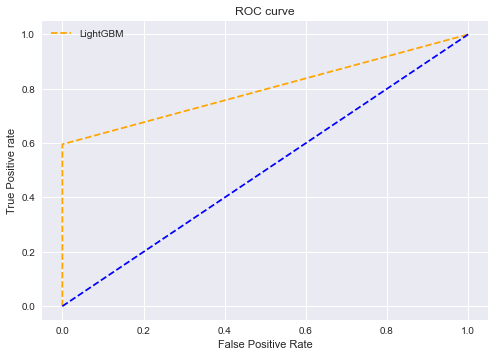

Precision mean: 0.886
Recall mean: 0.5166666666666667
Accuracy mean: 0.9882222222222222
F1-Score mean: 0.640888888888889
AUC mean: 0.7577777777777778


In [34]:
LGBM10 = fraudmodel.TimeSeriesKFold(X, y, 10, 'LightGBM')

-----LightGBM-----
Size of data set:  (15321, 10)
Size of each fold:  1021

Splitting the first 2 chunks with ratio 1:1
Size of train + test:  (2042, 10)
Precision on fold 2:  0.697
Recall on fold 2:  0.821
Accuracy on fold 2:  0.985
F1_score on fold 2:  0.754
AUC on fold 2:  0.906
Confusion-matrix: 
[[982  10]
 [  5  23]]


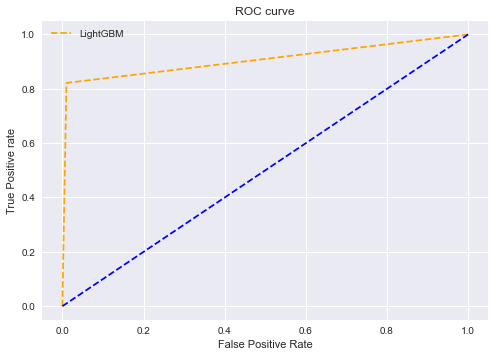


Splitting the first 3 chunks with ratio 2:1
Size of train + test:  (3063, 10)
Precision on fold 3:  0.824
Recall on fold 3:  0.519
Accuracy on fold 3:  0.984
F1_score on fold 3:  0.636
AUC on fold 3:  0.758
Confusion-matrix: 
[[990   3]
 [ 13  14]]


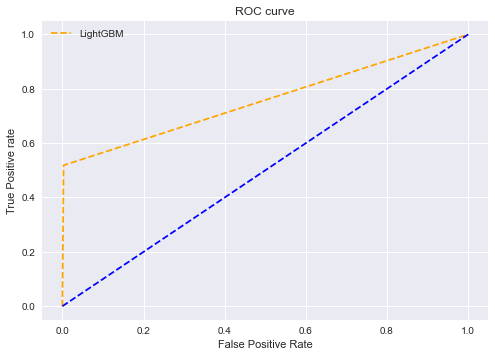


Splitting the first 4 chunks with ratio 3:1
Size of train + test:  (4084, 10)
Precision on fold 4:  0.75
Recall on fold 4:  0.462
Accuracy on fold 4:  0.982
F1_score on fold 4:  0.571
AUC on fold 4:  0.729
Confusion-matrix: 
[[990   4]
 [ 14  12]]


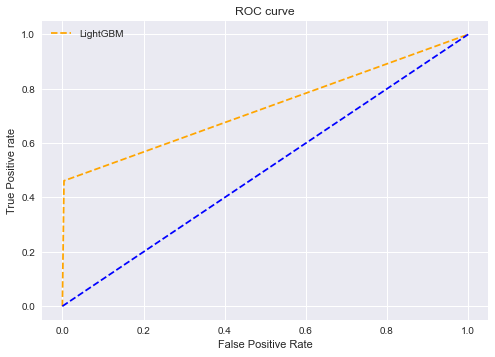


Splitting the first 5 chunks with ratio 4:1
Size of train + test:  (5105, 10)
Precision on fold 5:  0.938
Recall on fold 5:  0.652
Accuracy on fold 5:  0.991
F1_score on fold 5:  0.769
AUC on fold 5:  0.826
Confusion-matrix: 
[[996   1]
 [  8  15]]


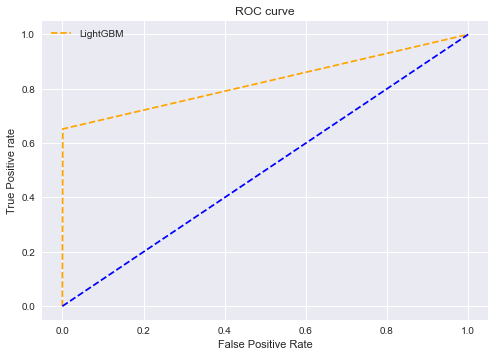


Splitting the first 6 chunks with ratio 5:1
Size of train + test:  (6126, 10)
Precision on fold 6:  0.933
Recall on fold 6:  0.519
Accuracy on fold 6:  0.986
F1_score on fold 6:  0.667
AUC on fold 6:  0.759
Confusion-matrix: 
[[992   1]
 [ 13  14]]


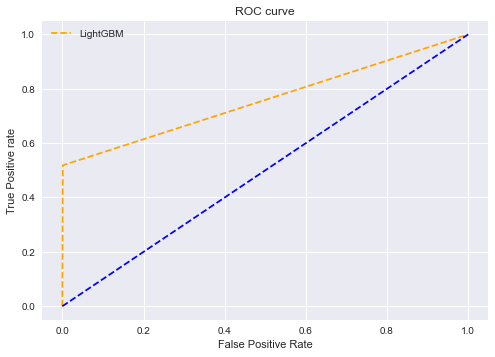


Splitting the first 7 chunks with ratio 6:1
Size of train + test:  (7147, 10)
Precision on fold 7:  0.944
Recall on fold 7:  0.531
Accuracy on fold 7:  0.984
F1_score on fold 7:  0.68
AUC on fold 7:  0.765
Confusion-matrix: 
[[987   1]
 [ 15  17]]


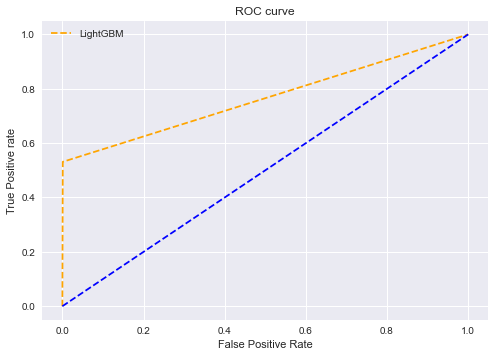


Splitting the first 8 chunks with ratio 7:1
Size of train + test:  (8168, 10)
Precision on fold 8:  0.833
Recall on fold 8:  0.455
Accuracy on fold 8:  0.993
F1_score on fold 8:  0.588
AUC on fold 8:  0.727
Confusion-matrix: 
[[1008    1]
 [   6    5]]


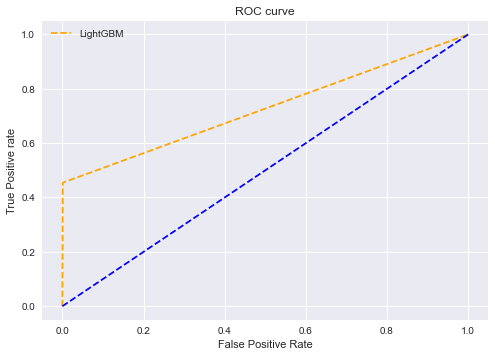


Splitting the first 9 chunks with ratio 8:1
Size of train + test:  (9189, 10)
Precision on fold 9:  0.75
Recall on fold 9:  0.3
Accuracy on fold 9:  0.992
F1_score on fold 9:  0.429
AUC on fold 9:  0.65
Confusion-matrix: 
[[1009    1]
 [   7    3]]


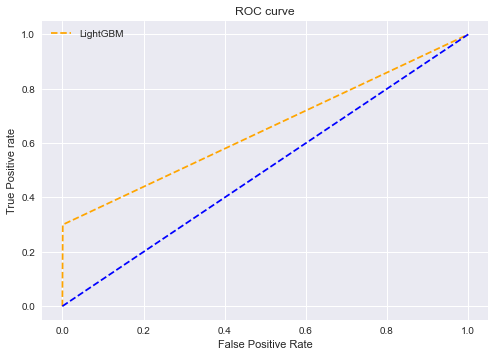


Splitting the first 10 chunks with ratio 9:1
Size of train + test:  (10210, 10)
Precision on fold 10:  0.8
Recall on fold 10:  0.235
Accuracy on fold 10:  0.986
F1_score on fold 10:  0.364
AUC on fold 10:  0.617
Confusion-matrix: 
[[1002    1]
 [  13    4]]


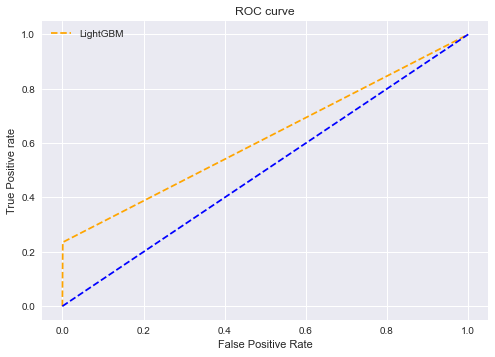


Splitting the first 11 chunks with ratio 10:1
Size of train + test:  (11231, 10)
Precision on fold 11:  1.0
Recall on fold 11:  0.75
Accuracy on fold 11:  0.998
F1_score on fold 11:  0.857
AUC on fold 11:  0.875
Confusion-matrix: 
[[1012    0]
 [   2    6]]


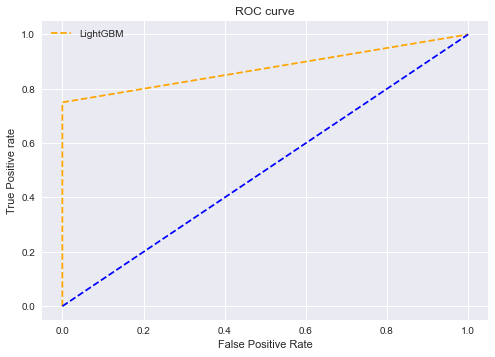


Splitting the first 12 chunks with ratio 11:1
Size of train + test:  (12252, 10)
Precision on fold 12:  0.889
Recall on fold 12:  0.276
Accuracy on fold 12:  0.978
F1_score on fold 12:  0.421
AUC on fold 12:  0.637
Confusion-matrix: 
[[990   1]
 [ 21   8]]


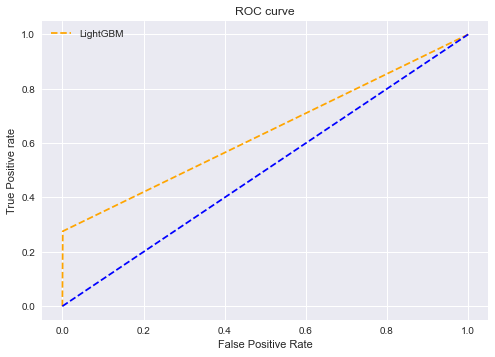


Splitting the first 13 chunks with ratio 12:1
Size of train + test:  (13273, 10)
Precision on fold 13:  0.875
Recall on fold 13:  0.778
Accuracy on fold 13:  0.997
F1_score on fold 13:  0.824
AUC on fold 13:  0.888
Confusion-matrix: 
[[1010    1]
 [   2    7]]


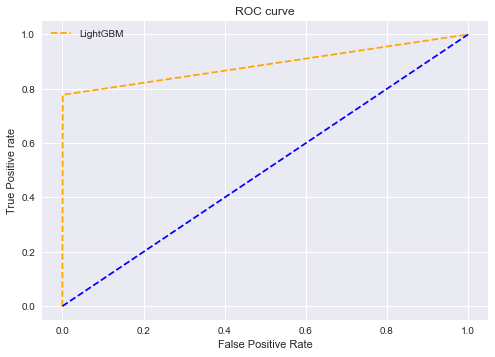


Splitting the first 14 chunks with ratio 13:1
Size of train + test:  (14294, 10)
Precision on fold 14:  0.984
Recall on fold 14:  0.9
Accuracy on fold 14:  0.992
F1_score on fold 14:  0.94
AUC on fold 14:  0.949
Confusion-matrix: 
[[949   1]
 [  7  63]]


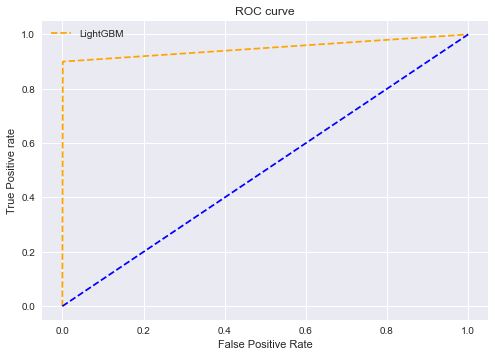


Splitting the first 15 chunks with ratio 14:1
Size of train + test:  (15315, 10)
Precision on fold 15:  1.0
Recall on fold 15:  0.488
Accuracy on fold 15:  0.979
F1_score on fold 15:  0.656
AUC on fold 15:  0.744
Confusion-matrix: 
[[979   0]
 [ 21  20]]


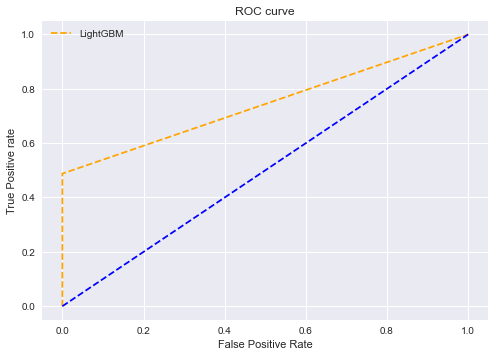

Precision mean: 0.872642857142857
Recall mean: 0.549
Accuracy mean: 0.987642857142857
F1-Score mean: 0.654
AUC mean: 0.7735714285714286


In [35]:
LGBM15 = fraudmodel.TimeSeriesKFold(X, y, 15, 'LightGBM')

-----LightGBM-----
Size of data set:  (15321, 10)
Size of each fold:  766

Splitting the first 2 chunks with ratio 1:1
Size of train + test:  (1532, 10)
Precision on fold 2:  0.765
Recall on fold 2:  0.765
Accuracy on fold 2:  0.99
F1_score on fold 2:  0.765
AUC on fold 2:  0.88
Confusion-matrix: 
[[744   4]
 [  4  13]]


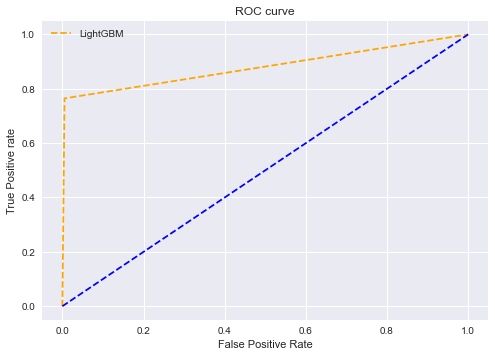


Splitting the first 3 chunks with ratio 2:1
Size of train + test:  (2298, 10)
Precision on fold 3:  0.955
Recall on fold 3:  0.808
Accuracy on fold 3:  0.992
F1_score on fold 3:  0.875
AUC on fold 3:  0.903
Confusion-matrix: 
[[738   1]
 [  5  21]]


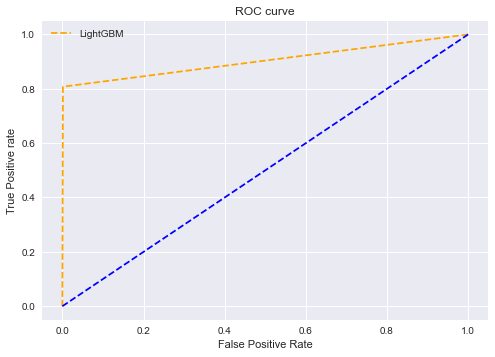


Splitting the first 4 chunks with ratio 3:1
Size of train + test:  (3064, 10)
Precision on fold 4:  0.8
Recall on fold 4:  0.471
Accuracy on fold 4:  0.986
F1_score on fold 4:  0.593
AUC on fold 4:  0.734
Confusion-matrix: 
[[746   2]
 [  9   8]]


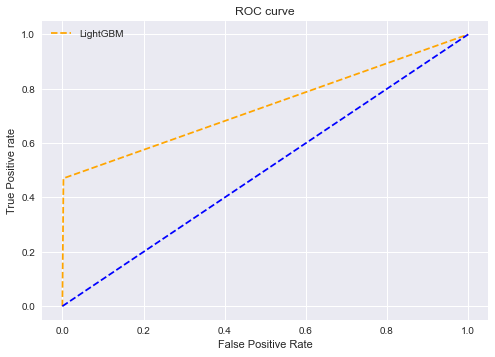


Splitting the first 5 chunks with ratio 4:1
Size of train + test:  (3830, 10)
Precision on fold 5:  0.333
Recall on fold 5:  0.083
Accuracy on fold 5:  0.983
F1_score on fold 5:  0.133
AUC on fold 5:  0.54
Confusion-matrix: 
[[751   2]
 [ 11   1]]


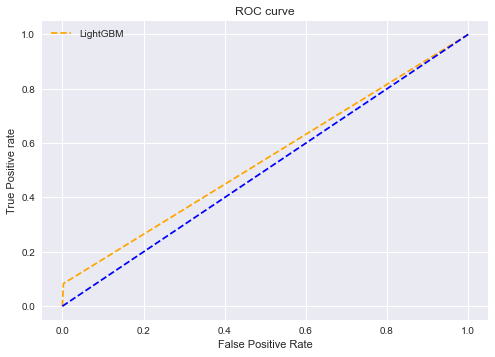


Splitting the first 6 chunks with ratio 5:1
Size of train + test:  (4596, 10)
Precision on fold 6:  0.938
Recall on fold 6:  0.625
Accuracy on fold 6:  0.987
F1_score on fold 6:  0.75
AUC on fold 6:  0.812
Confusion-matrix: 
[[740   1]
 [  9  15]]


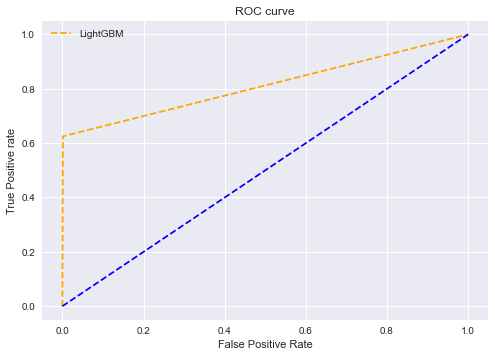


Splitting the first 7 chunks with ratio 6:1
Size of train + test:  (5362, 10)
Precision on fold 7:  1.0
Recall on fold 7:  0.688
Accuracy on fold 7:  0.993
F1_score on fold 7:  0.815
AUC on fold 7:  0.844
Confusion-matrix: 
[[749   0]
 [  5  11]]


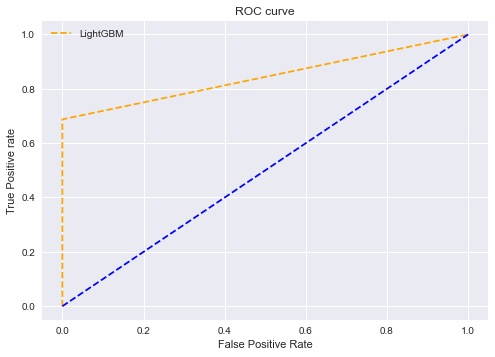


Splitting the first 8 chunks with ratio 7:1
Size of train + test:  (6128, 10)
Precision on fold 8:  0.933
Recall on fold 8:  0.583
Accuracy on fold 8:  0.986
F1_score on fold 8:  0.718
AUC on fold 8:  0.791
Confusion-matrix: 
[[740   1]
 [ 10  14]]


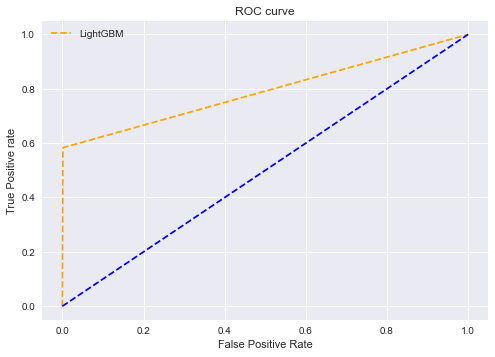


Splitting the first 9 chunks with ratio 8:1
Size of train + test:  (6894, 10)
Precision on fold 9:  0.944
Recall on fold 9:  0.63
Accuracy on fold 9:  0.986
F1_score on fold 9:  0.756
AUC on fold 9:  0.814
Confusion-matrix: 
[[737   1]
 [ 10  17]]


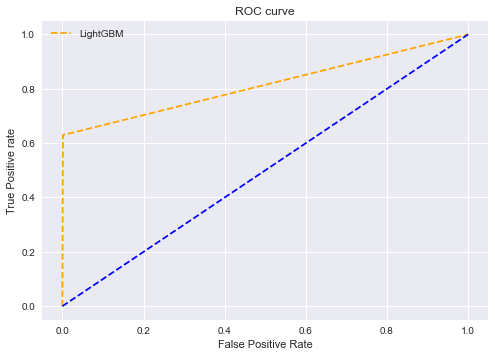


Splitting the first 10 chunks with ratio 9:1
Size of train + test:  (7660, 10)
Precision on fold 10:  1.0
Recall on fold 10:  0.556
Accuracy on fold 10:  0.995
F1_score on fold 10:  0.714
AUC on fold 10:  0.778
Confusion-matrix: 
[[756   0]
 [  4   5]]


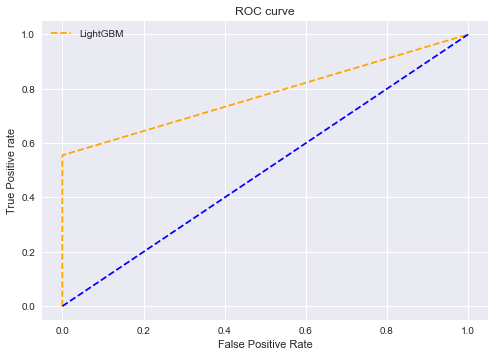


Splitting the first 11 chunks with ratio 10:1
Size of train + test:  (8426, 10)
Precision on fold 11:  0.667
Recall on fold 11:  0.2
Accuracy on fold 11:  0.988
F1_score on fold 11:  0.308
AUC on fold 11:  0.599
Confusion-matrix: 
[[754   1]
 [  8   2]]


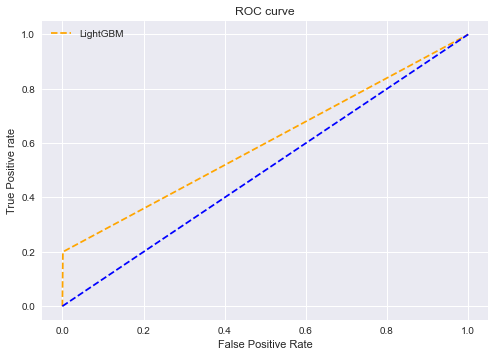


Splitting the first 12 chunks with ratio 11:1
Size of train + test:  (9192, 10)
Precision on fold 12:  0.75
Recall on fold 12:  0.429
Accuracy on fold 12:  0.993
F1_score on fold 12:  0.545
AUC on fold 12:  0.714
Confusion-matrix: 
[[757   1]
 [  4   3]]


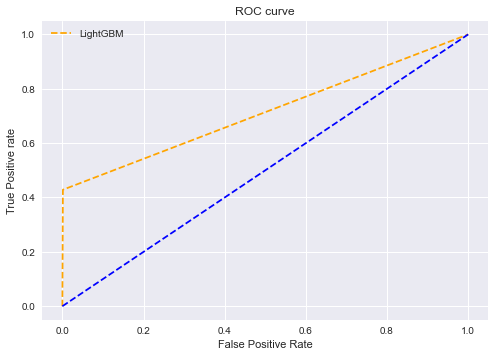


Splitting the first 13 chunks with ratio 12:1
Size of train + test:  (9958, 10)
Precision on fold 13:  0.833
Recall on fold 13:  0.312
Accuracy on fold 13:  0.984
F1_score on fold 13:  0.455
AUC on fold 13:  0.656
Confusion-matrix: 
[[748   1]
 [ 11   5]]


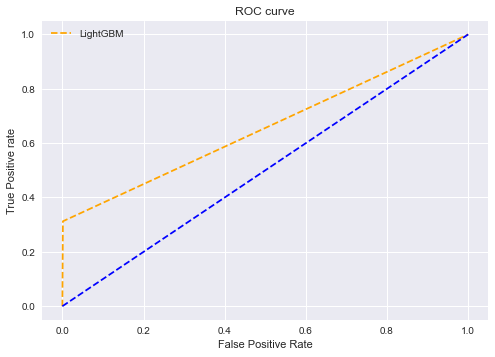


Splitting the first 14 chunks with ratio 13:1
Size of train + test:  (10724, 10)
Precision on fold 14:  1.0
Recall on fold 14:  0.667
Accuracy on fold 14:  0.997
F1_score on fold 14:  0.8
AUC on fold 14:  0.833
Confusion-matrix: 
[[759   0]
 [  2   4]]


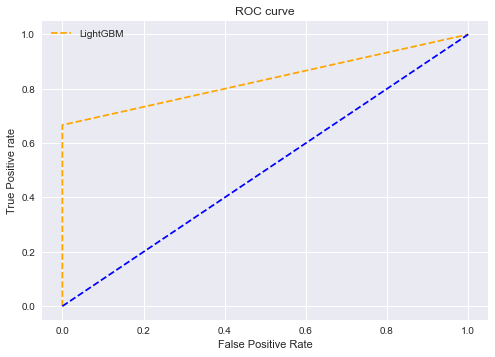


Splitting the first 15 chunks with ratio 14:1
Size of train + test:  (11490, 10)
Precision on fold 15:  1.0
Recall on fold 15:  0.571
Accuracy on fold 15:  0.996
F1_score on fold 15:  0.727
AUC on fold 15:  0.786
Confusion-matrix: 
[[758   0]
 [  3   4]]


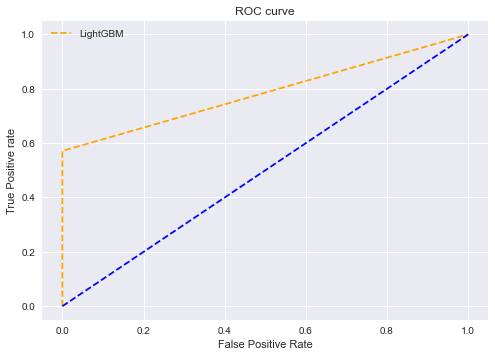


Splitting the first 16 chunks with ratio 15:1
Size of train + test:  (12256, 10)
Precision on fold 16:  1.0
Recall on fold 16:  0.24
Accuracy on fold 16:  0.975
F1_score on fold 16:  0.387
AUC on fold 16:  0.62
Confusion-matrix: 
[[740   0]
 [ 19   6]]


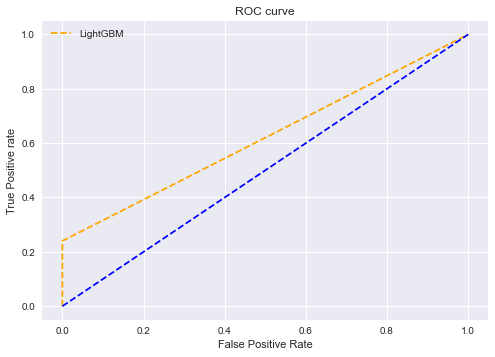


Splitting the first 17 chunks with ratio 16:1
Size of train + test:  (13022, 10)
Precision on fold 17:  0.857
Recall on fold 17:  0.75
Accuracy on fold 17:  0.996
F1_score on fold 17:  0.8
AUC on fold 17:  0.874
Confusion-matrix: 
[[756   1]
 [  2   6]]


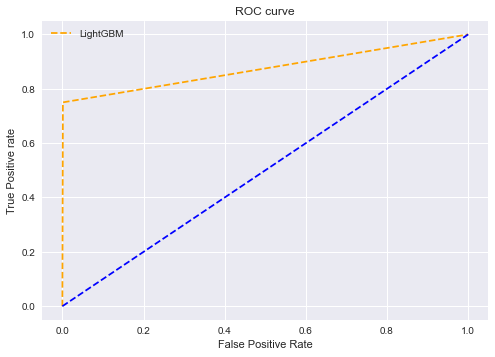


Splitting the first 18 chunks with ratio 17:1
Size of train + test:  (13788, 10)
Precision on fold 18:  0.983
Recall on fold 18:  0.908
Accuracy on fold 18:  0.991
F1_score on fold 18:  0.944
AUC on fold 18:  0.953
Confusion-matrix: 
[[699   1]
 [  6  59]]


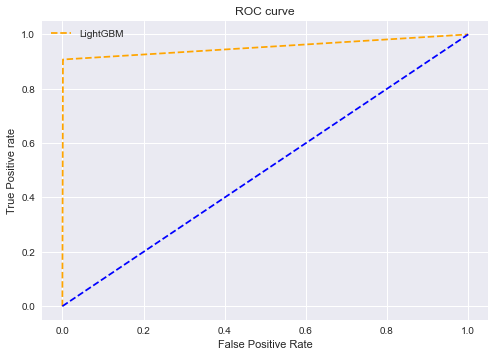


Splitting the first 19 chunks with ratio 18:1
Size of train + test:  (14554, 10)
Precision on fold 19:  1.0
Recall on fold 19:  0.714
Accuracy on fold 19:  0.997
F1_score on fold 19:  0.833
AUC on fold 19:  0.857
Confusion-matrix: 
[[758   0]
 [  2   5]]


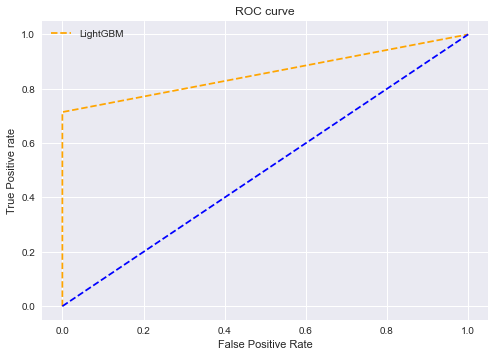


Splitting the first 20 chunks with ratio 19:1
Size of train + test:  (15320, 10)
Precision on fold 20:  1.0
Recall on fold 20:  0.475
Accuracy on fold 20:  0.973
F1_score on fold 20:  0.644
AUC on fold 20:  0.738
Confusion-matrix: 
[[725   0]
 [ 21  19]]


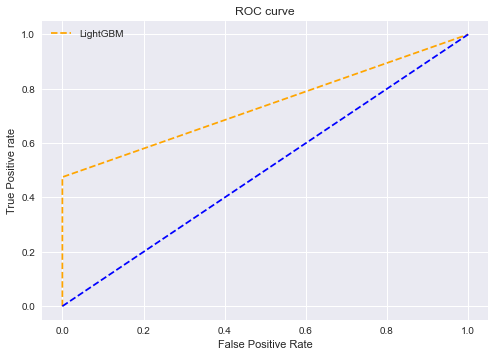

Precision mean: 0.882
Recall mean: 0.5513157894736842
Accuracy mean: 0.9888421052631577
F1-Score mean: 0.6611578947368422
AUC mean: 0.7750526315789473


In [36]:
LGBM20 = fraudmodel.TimeSeriesKFold(X, y, 20, 'LightGBM')

In [37]:
RFmodels = [[RF5,RF10],[RF15,RF20]]
LGBMmodels = [[LGBM5,LGBM10],[LGBM15,LGBM20]]

def plotmodel(models, method):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30,20))
    k = 5
    for r in range(len(models)):
        for c in range(len(models)):
            axes[r,c].set_title(method + ' - ' + str(k) + ' Fold', fontsize=30)
            axes[r,c].set_xlabel('time',fontsize=30)
            axes[r,c].set_ylabel('rate',fontsize=30)
            axes[r,c].plot(models[r][c][0], label='precision')
            axes[r,c].plot(models[r][c][1], label='recall')
            axes[r,c].plot(models[r][c][2], label='accuracy')
            axes[r,c].plot(models[r][c][3], label='f1_score')
            axes[r,c].plot(models[r][c][4], label='AUC')
            axes[r,c].legend(fontsize=20)
            k += 5

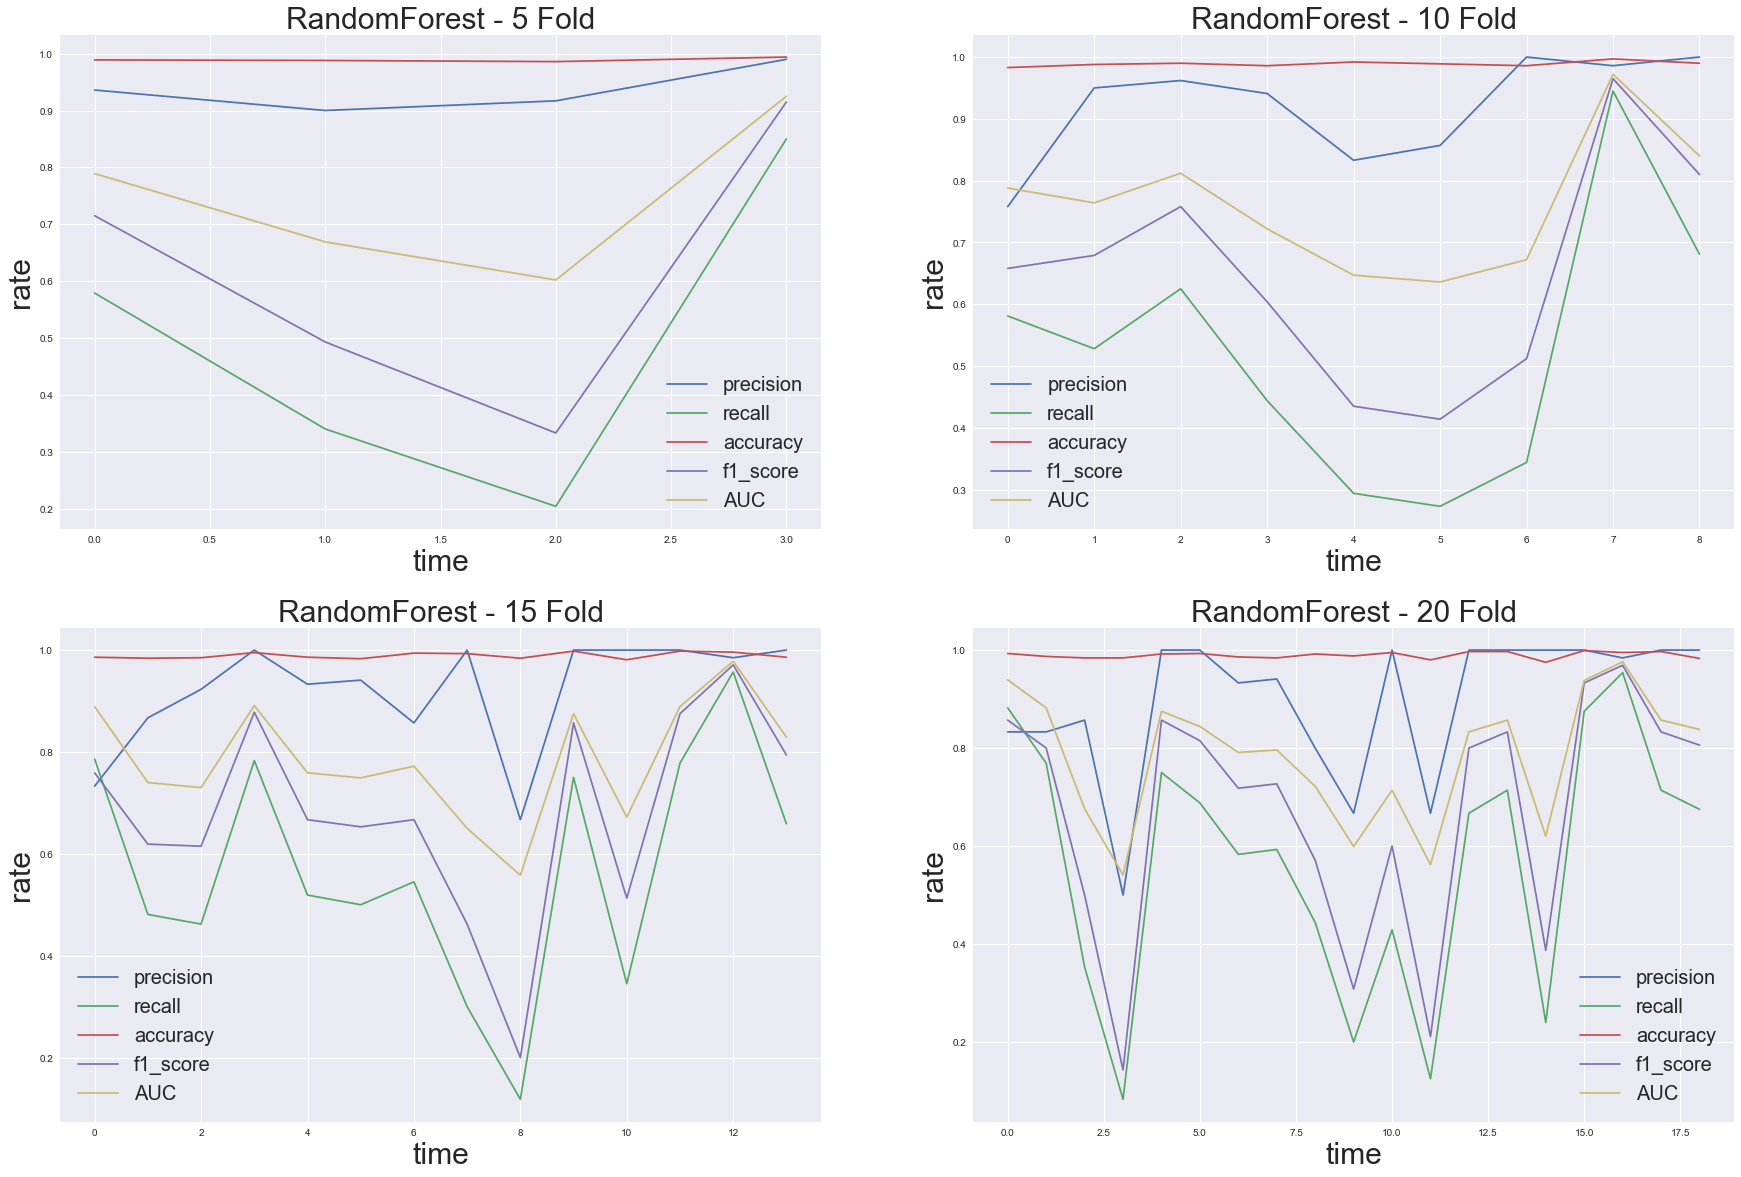

In [38]:
plotmodel(RFmodels,'RandomForest')

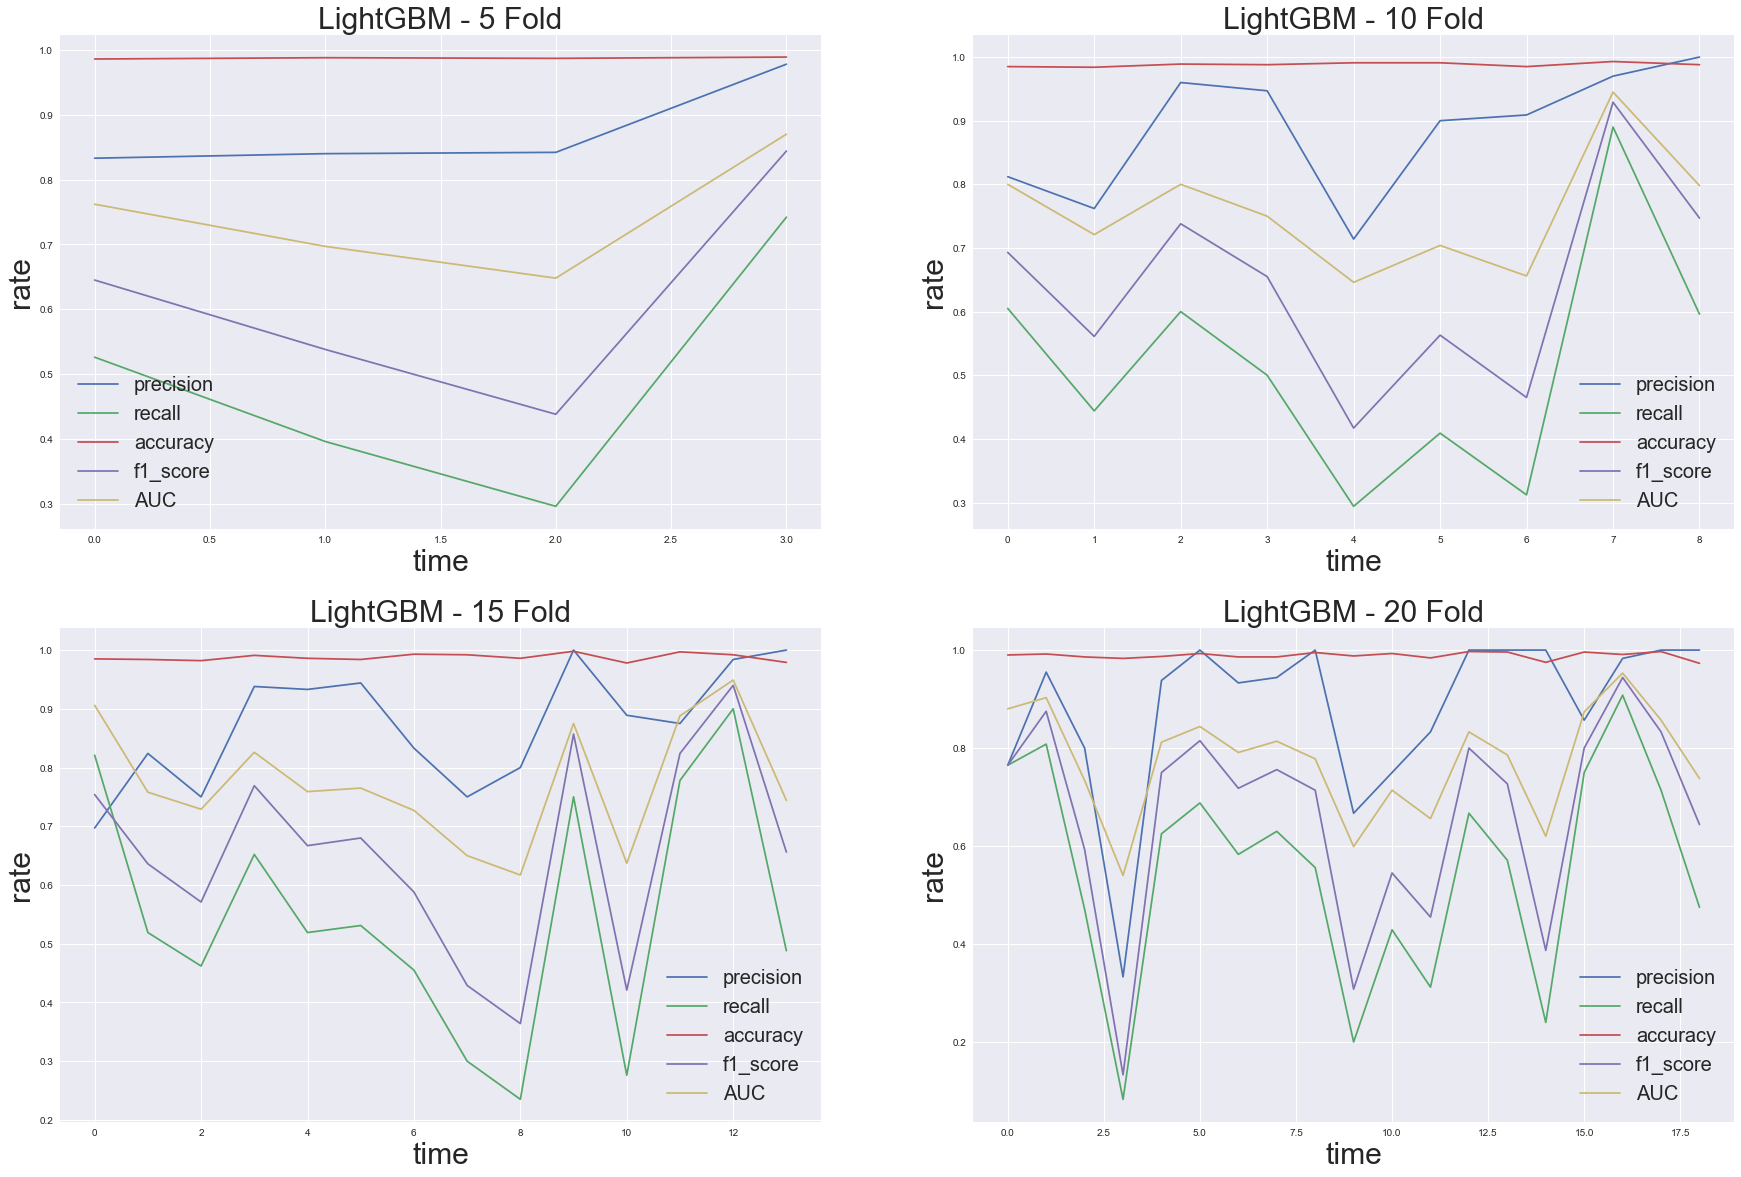

In [39]:
plotmodel(LGBMmodels,'LightGBM')

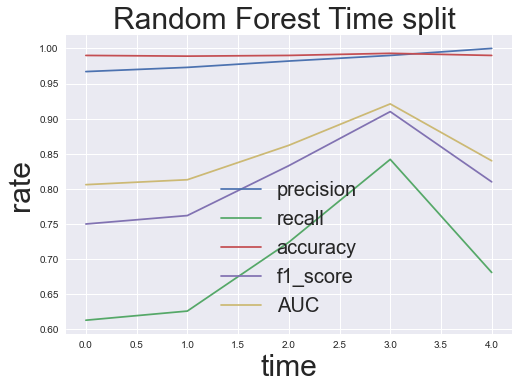

In [40]:
n = np.array(Generalsplit).transpose()
plt.title('Random Forest Time split ', fontsize=30)
plt.xlabel('time',fontsize=30)
plt.ylabel('rate',fontsize=30)
plt.plot(n[0],label='precision')
plt.plot(n[1],label='recall')
plt.plot(n[2],label='accuracy')
plt.plot(n[3],label='f1_score')
plt.plot(n[4],label='AUC')
plt.legend(fontsize=20)
plt.show()

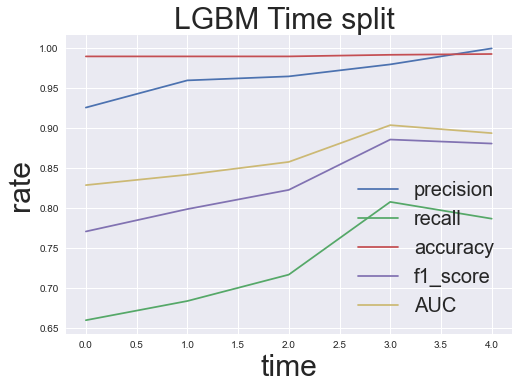

In [41]:
n = np.array(GeneralLGBM).transpose()
plt.title('LGBM Time split ', fontsize=30)
plt.xlabel('time',fontsize=30)
plt.ylabel('rate',fontsize=30)
plt.plot(n[0],label='precision')
plt.plot(n[1],label='recall')
plt.plot(n[2],label='accuracy')
plt.plot(n[3],label='f1_score')
plt.plot(n[4],label='AUC')
plt.legend(fontsize=20)
plt.show()

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text